### Version History
* V22 - Added Keras Tune
* V23 - Added Boxplots
* V24 - Added Pipelines for Classifiers
* V25 - Added Learning Curves
* V26 - New Model Stacking
* V27 - Added Model Building Function
* V32 - Updated Model Building Function
* V34 - Added History
* V36 - Added CatBoost and LightGBM algorithms

# Introduction

### Welcome to my first ever Machine Learning project/Kaggle Competition!

In this notebook we'll do some easy data visualizations and feature engineering before applying different machine learning algorithms like Logistic Regression, Random Forest, Support Vector Machines and more. We're also using a Neural Network using Keras and Tensorflow with a Keras-Tuner for hyperparameter optimization. For better understanding of the dataset and algorithms we'll use a PCA and ROC-Curves.

#### If you have any suggestions on how to improve this notebook please let me know!

# History
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast.

# Goal
It is our job to predict if a passenger survived the sinking of the Titanic or not. For each person in the test set, we must predict a 0 or 1 value for the variable. Our score is the percentage of passengers we correctly predict. 

# 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import missingno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

style.use("seaborn-whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# 2. Import data

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [3]:
data_size_train = train.memory_usage().sum() / 1024 / 1024
print("Data memory size: %.2f MB" % data_size_train)

Data memory size: 0.08 MB


In [4]:
data_size_test = test.memory_usage().sum() / 1024 / 1024
print("Data memory size: %.2f MB" % data_size_test)

Data memory size: 0.04 MB


# 3. Data exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
print(train.shape)
train.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
print(test.shape)
test.head(3)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


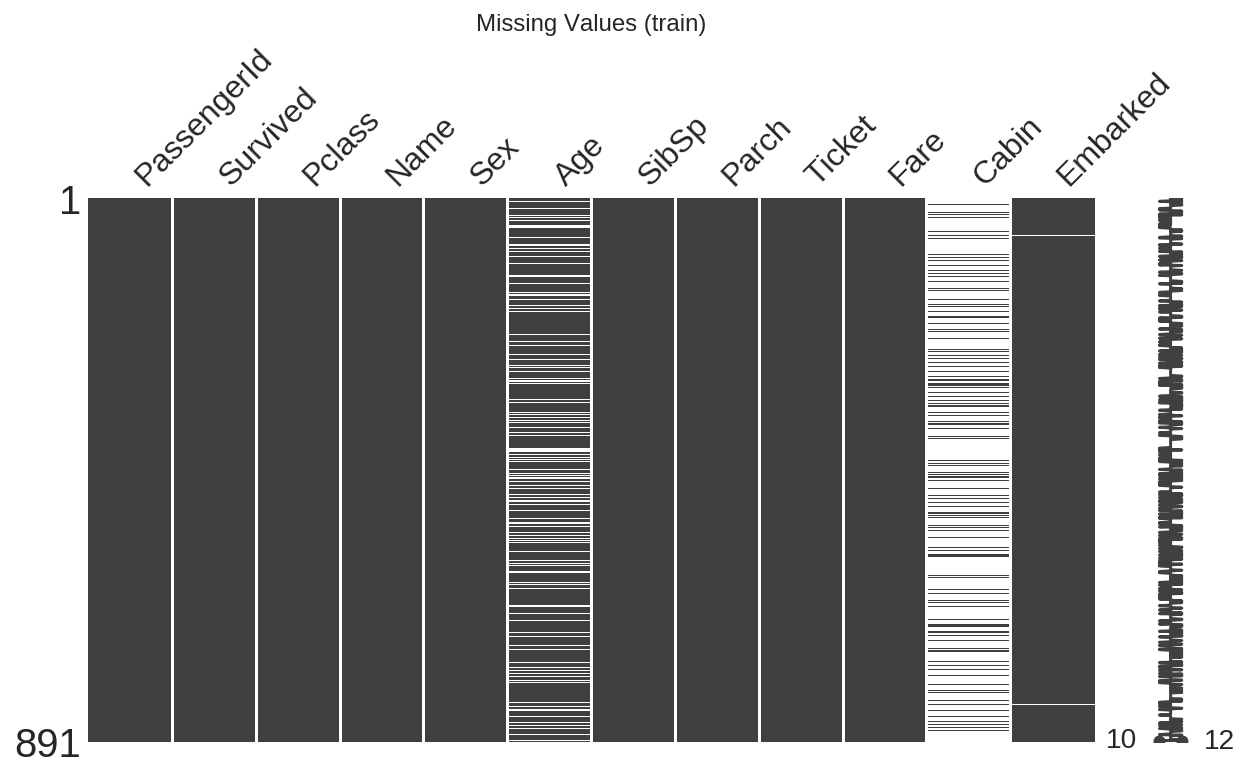

In [9]:
missingno.matrix(train, figsize = (10,5))
plt.title("Missing Values (train)")
plt.show()

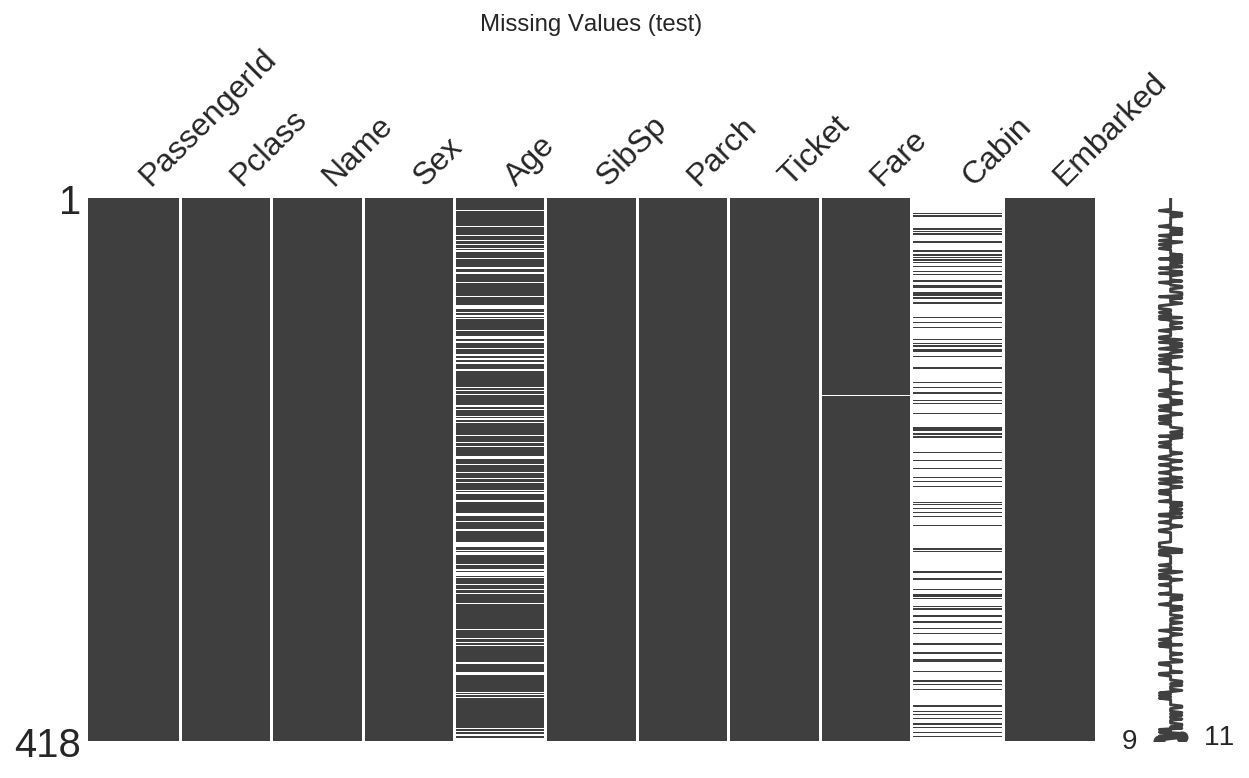

In [10]:
missingno.matrix(test, figsize = (10,5))
plt.title("Missing Values (test)")
plt.show()

In [11]:
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace = True)
train["Age"].fillna(train["Age"].mean(), inplace = True)
train = train.drop(["Cabin", "Ticket"], axis = 1)
print(train.isnull().sum().sort_values(ascending = False).head(3))

print("-------------")

test["Fare"].fillna(test["Fare"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)
test = test.drop(["Cabin", "Ticket"], axis = 1)
print(test.isnull().sum().sort_values(ascending = False).head(3))

Embarked    0
Fare        0
Parch       0
dtype: int64
-------------
Embarked    0
Fare        0
Parch       0
dtype: int64


# 4. Feature engineering

## 4.1 Name Title

In [12]:
train["NameTitle"] = train["Name"].str.split(", ", expand = True)[1].str.split(". ", expand = True)[0]
test["NameTitle"] = test["Name"].str.split(", ", expand = True)[1].str.split(". ", expand = True)[0]

train = train.drop("Name", axis = 1)
test = test.drop("Name", axis = 1)

print(train["NameTitle"].unique())
print("------------------------" * 3)
print(test["NameTitle"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'th' 'Jonkheer']
------------------------------------------------------------------------
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [13]:
min_titles = (train["NameTitle"].value_counts() < 10)
train["NameTitle"] = train["NameTitle"].apply(lambda x: "Misc" if min_titles.loc[x] == True else x)
print(train["NameTitle"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Misc']


In [14]:
min_titles = (test["NameTitle"].value_counts() < 10)
test["NameTitle"] = test["NameTitle"].apply(lambda x: "Misc" if min_titles.loc[x] == True else x)
print(test["NameTitle"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Misc']


## 4.2 Family Size

In [15]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

## 4.3 Age Group

In [16]:
train["AgeGroup"] = ""
train.loc[train["Age"] < 21, "AgeGroup"] = "under 21"
train.loc[train["Age"] >= 21, "AgeGroup"] = "21-65"
train.loc[train["Age"] > 65, "AgeGroup"] = "65+"

test["AgeGroup"] = ""
test.loc[test["Age"] < 21, "AgeGroup"] = "under 21"
test.loc[test["Age"] >= 21, "AgeGroup"] = "21-65"
test.loc[test["Age"] > 65, "AgeGroup"] = "65+"

train = train.drop("Age", axis = 1)
test = test.drop("Age", axis = 1)

## 4.4 Fare Group

In [17]:
train["FareGroup"] = ""
train.loc[train["Fare"] < 170, "FareGroup"] = "0-170"
train.loc[train["Fare"] >= 170, "FareGroup"] = "170-340"
train.loc[train["Fare"] > 340, "FareGroup"] = "340+"

test["FareGroup"] = ""
test.loc[test["Fare"] < 170, "FareGroup"] = "0-170"
test.loc[test["Fare"] >= 170, "FareGroup"] = "170-340"
test.loc[test["Fare"] > 340, "FareGroup"] = "340+"

train = train.drop("Fare", axis = 1)
test = test.drop("Fare", axis = 1)

In [18]:
print(train.shape)
train.head(3)

(891, 11)


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,NameTitle,FamilySize,AgeGroup,FareGroup
0,1,0,3,male,1,0,S,Mr,1,21-65,0-170
1,2,1,1,female,1,0,C,Mrs,1,21-65,0-170
2,3,1,3,female,0,0,S,Miss,0,21-65,0-170


In [19]:
print(test.shape)
test.head(3)

(418, 10)


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,NameTitle,FamilySize,AgeGroup,FareGroup
0,892,3,male,0,0,Q,Mr,0,21-65,0-170
1,893,3,female,1,0,S,Mrs,1,21-65,0-170
2,894,2,male,0,0,Q,Mr,0,21-65,0-170


# 5. Data visualization

## 5.1 Survived

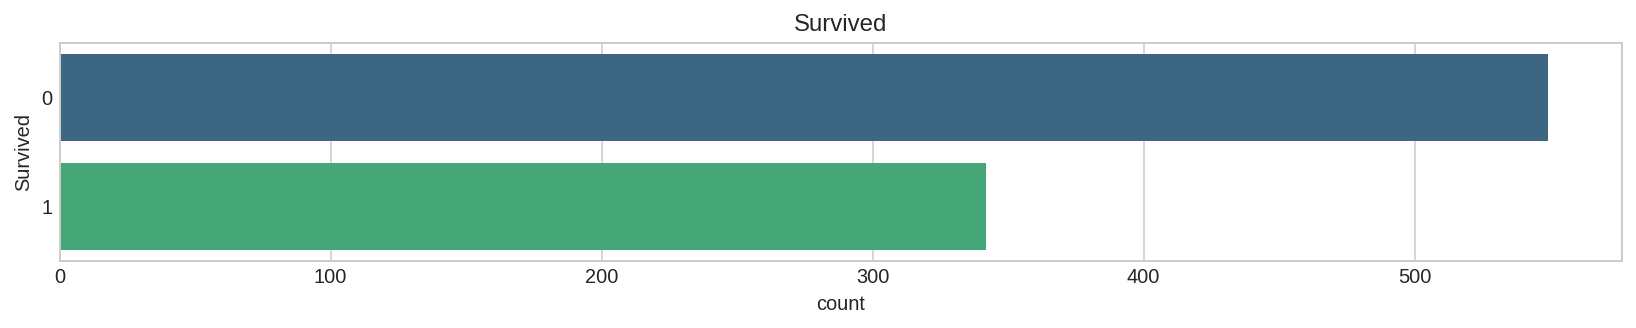

In [20]:
plt.figure(figsize = (14,2))
sns.countplot(data = train, y = "Survived", palette = "viridis")
plt.title("Survived")
plt.show()

## 5.2 Class

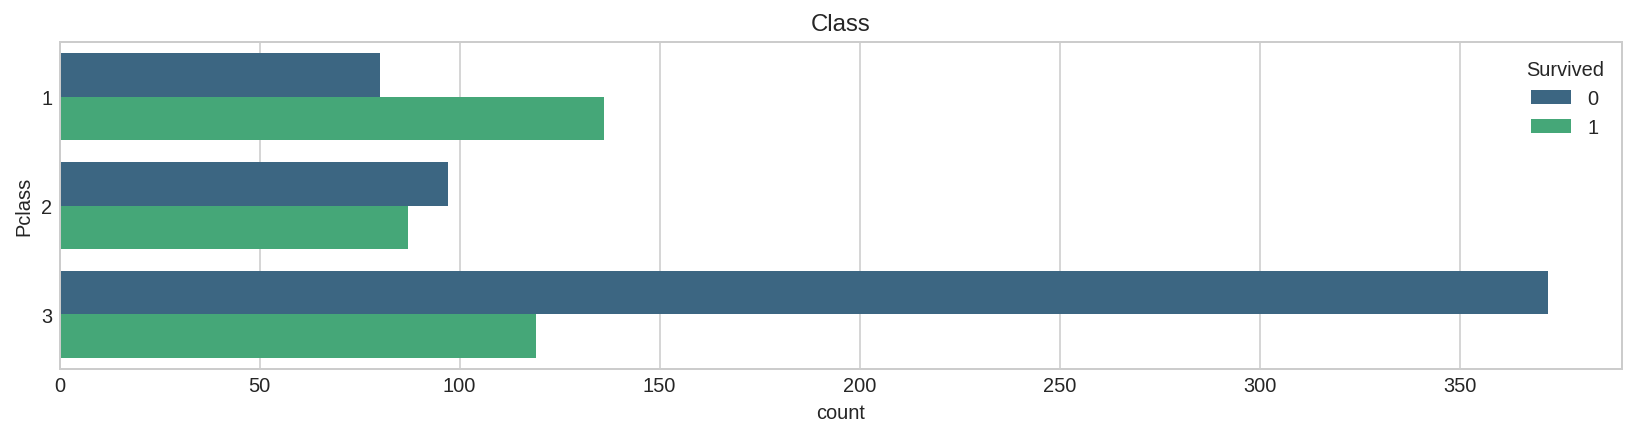

In [21]:
plt.figure(figsize = (14,3))
sns.countplot(data = train, y = "Pclass", hue = "Survived", palette = "viridis")
plt.title("Class")
plt.show()

## 5.3 Gender

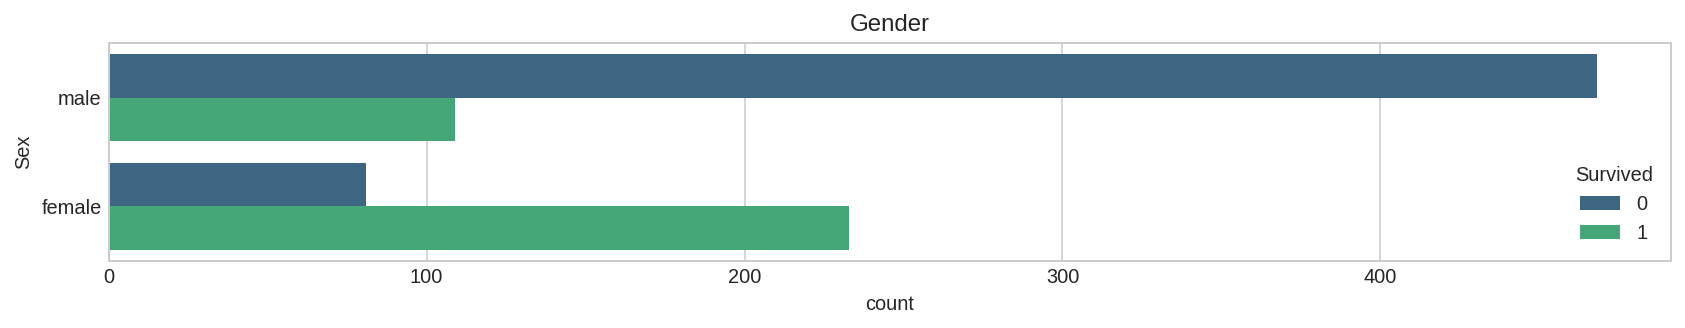

In [22]:
plt.figure(figsize = (14,2))
sns.countplot(data = train, y = "Sex", hue = "Survived", palette = "viridis")
plt.title("Gender")
plt.show()

## 5.4 Family Size

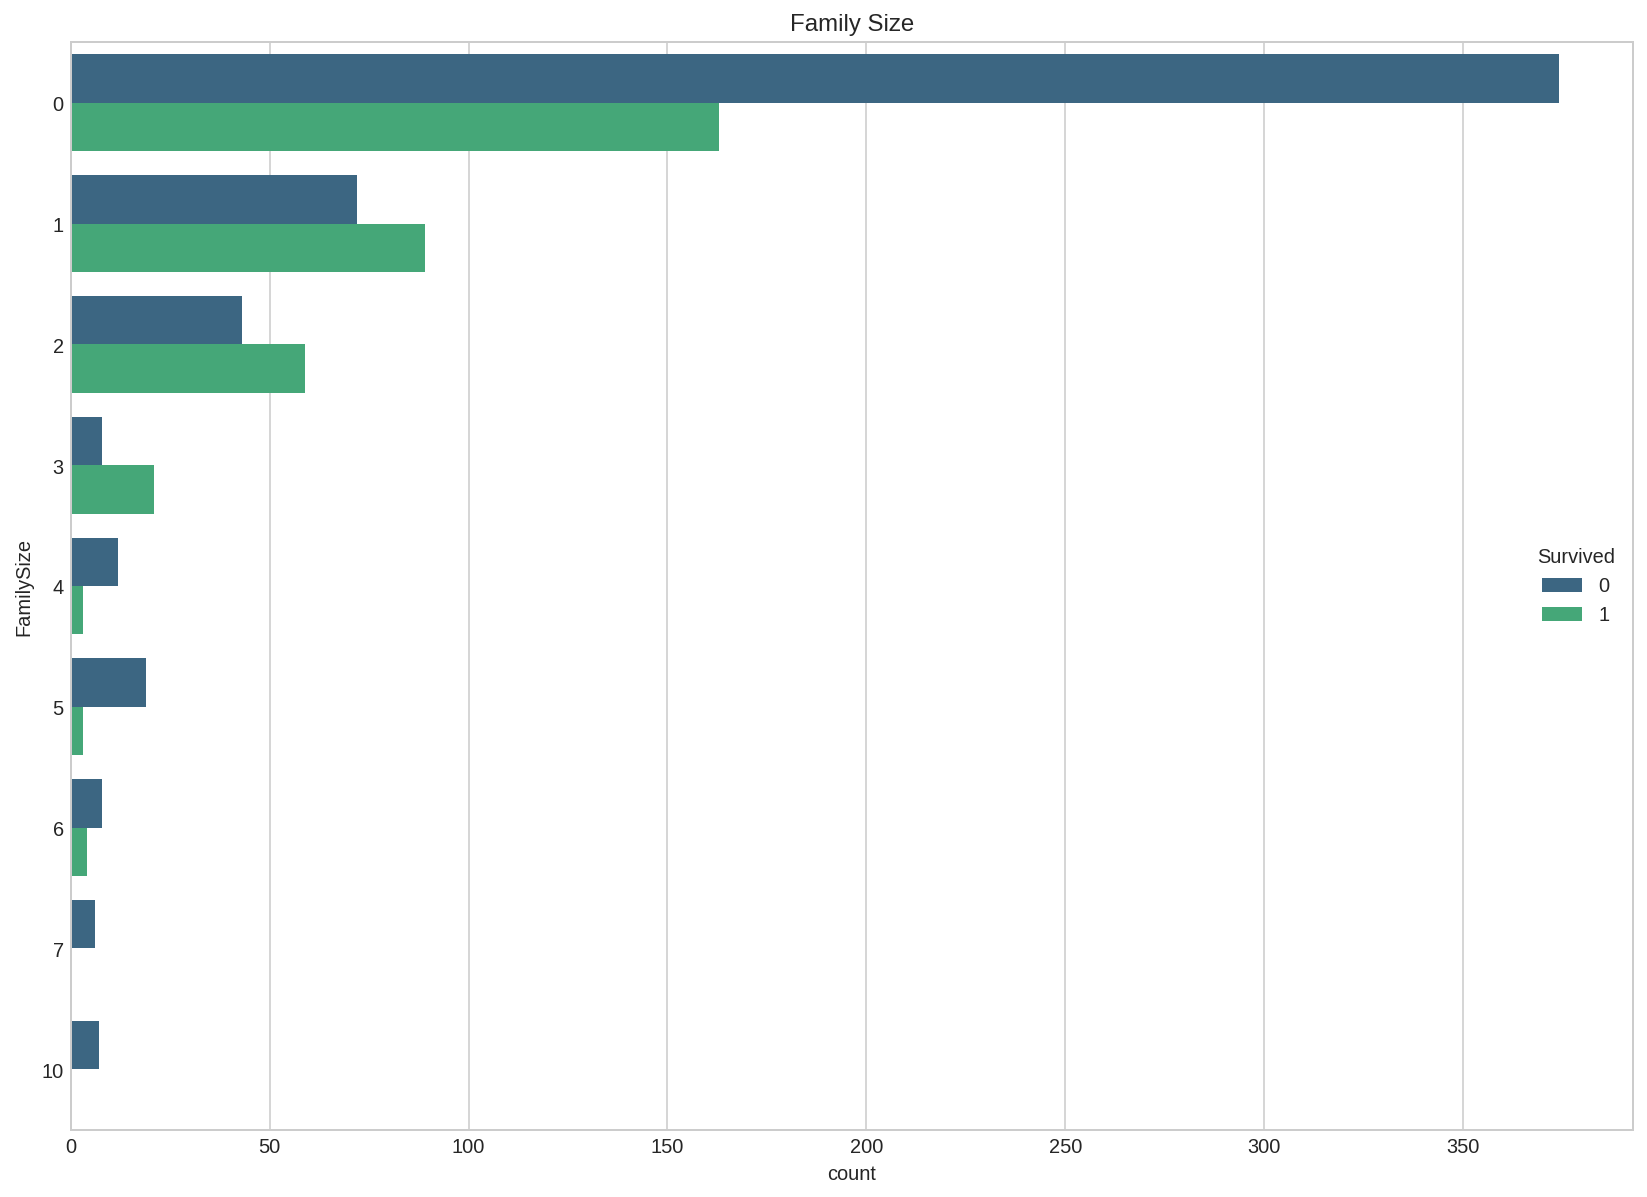

In [23]:
plt.figure(figsize = (14,10))
sns.countplot(data = train, y = "FamilySize", hue = "Survived", palette = "viridis")
plt.title("Family Size")
plt.show()

## 5.5 Embarked

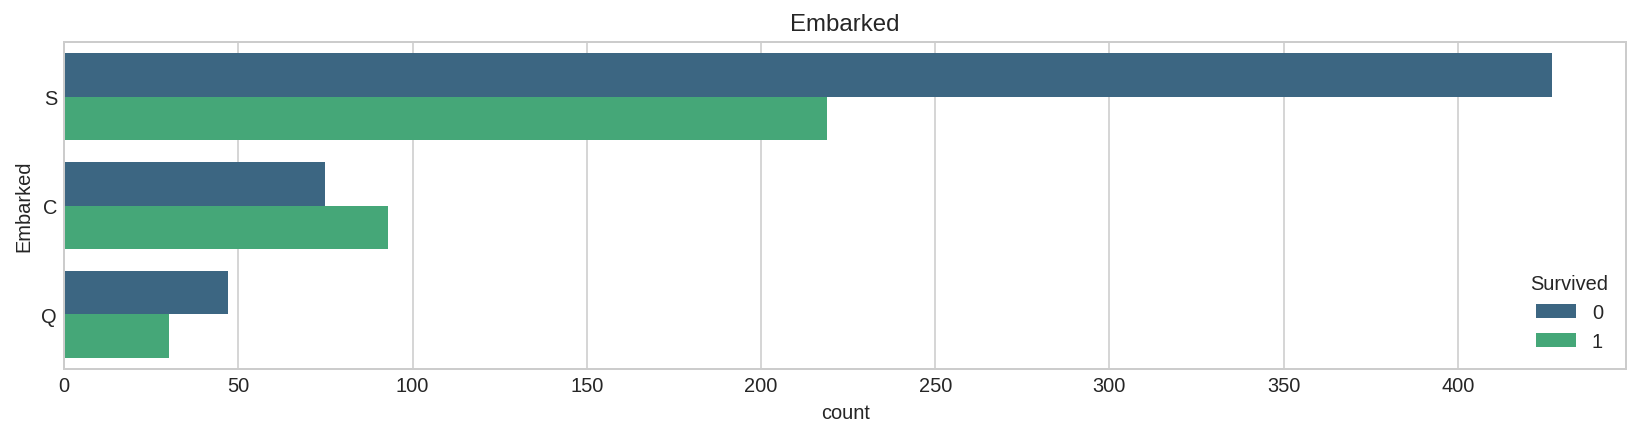

In [24]:
plt.figure(figsize = (14,3))
sns.countplot(data = train, y = "Embarked", hue = "Survived", palette = "viridis")
plt.title("Embarked")
plt.show()

## 5.6 Name Title

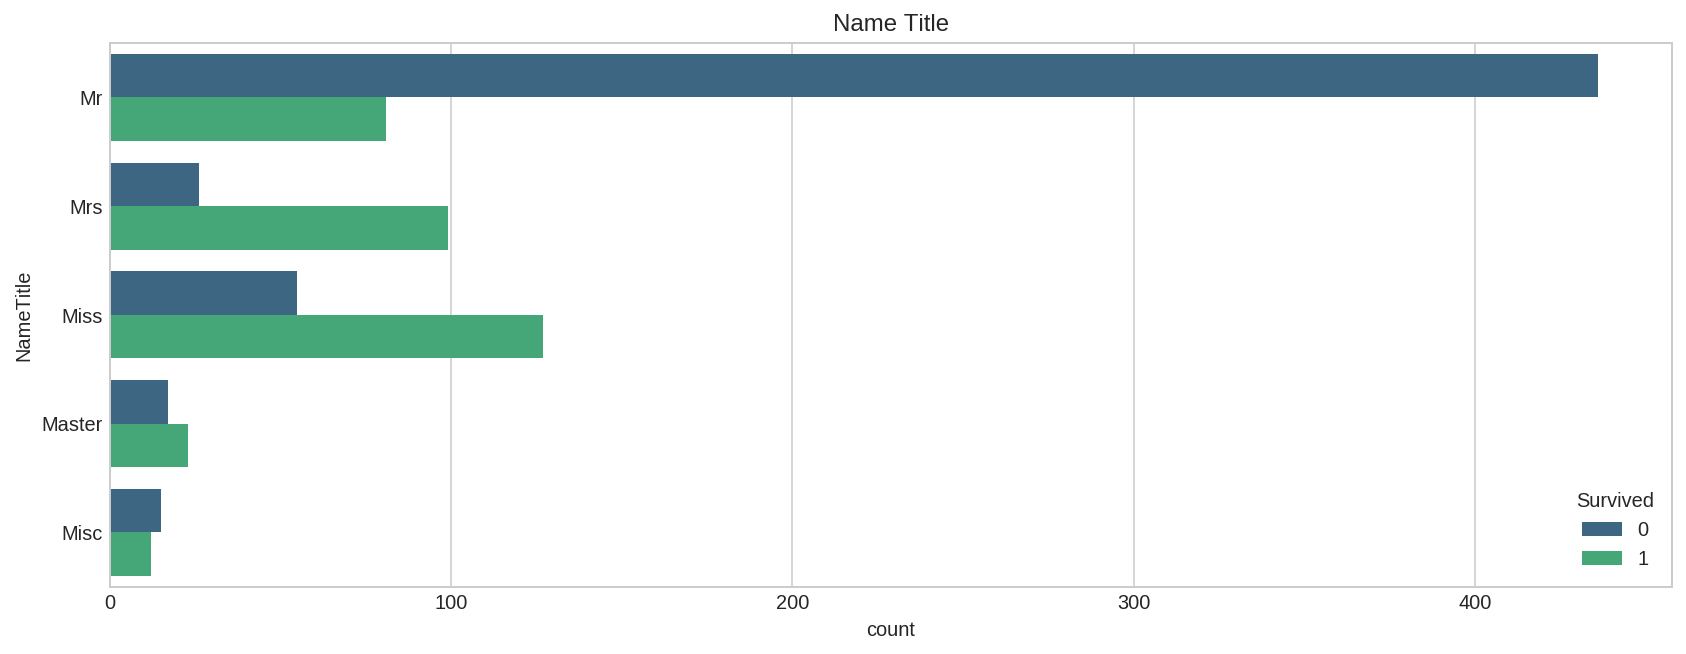

In [25]:
plt.figure(figsize = (14,5))
sns.countplot(data = train, y = "NameTitle", hue = "Survived", palette = "viridis")
plt.title("Name Title")
plt.show()

## 5.7 Age Group

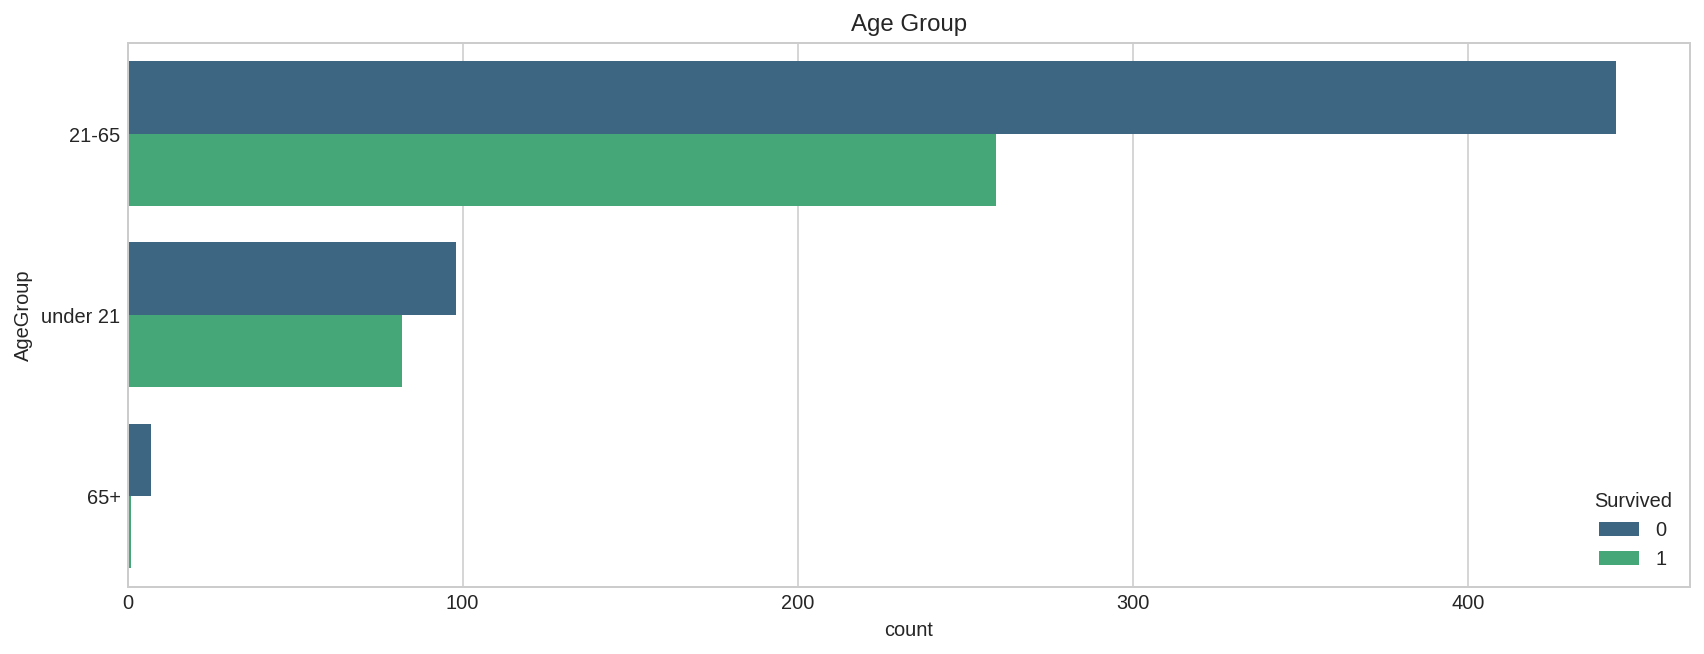

In [26]:
plt.figure(figsize = (14,5))
sns.countplot(data = train, y = "AgeGroup", hue = "Survived", palette = "viridis")
plt.title("Age Group")
plt.show()

## 5.8 Fare Group

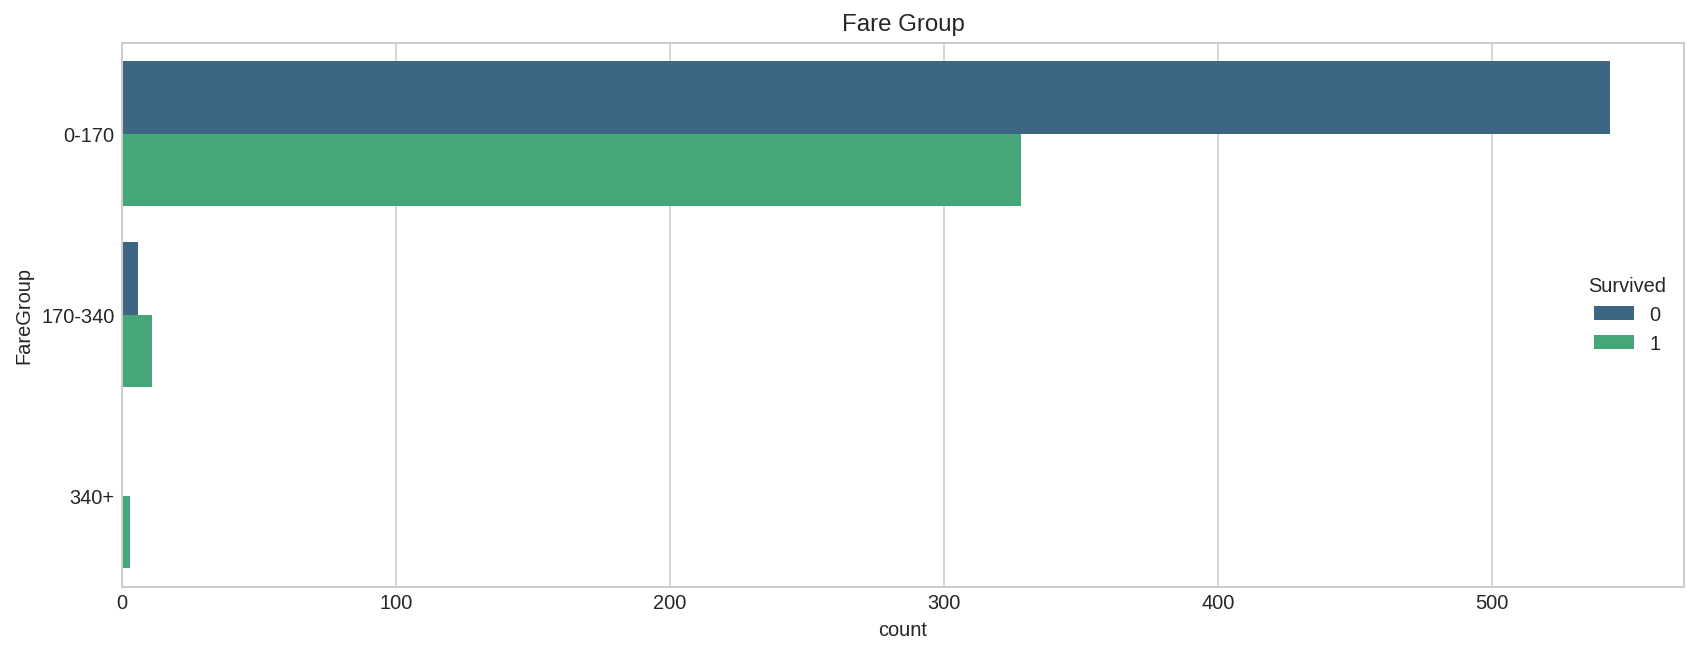

In [27]:
plt.figure(figsize = (14,5))
sns.countplot(data = train, y = "FareGroup", hue = "Survived", palette = "viridis")
plt.title("Fare Group")
plt.show()

## 5.9 Correlation

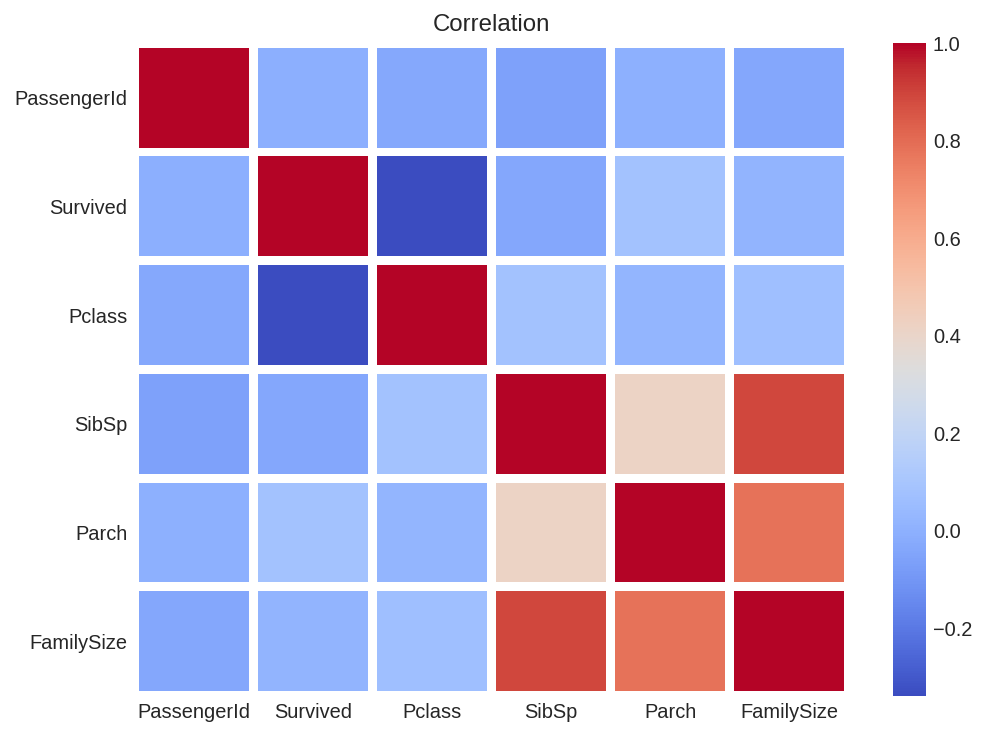

In [28]:
corr = train.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 4, linecolor = "white")
plt.title("Correlation")
plt.show()

In [29]:
train = train.drop(["SibSp", "Parch"], axis = 1)
test = test.drop(["SibSp", "Parch"], axis = 1)

In [30]:
train = pd.get_dummies(train, columns = ["Sex", "Embarked", "NameTitle", "AgeGroup", "FareGroup"])
test = pd.get_dummies(test, columns = ["Sex", "Embarked", "NameTitle", "AgeGroup", "FareGroup"])

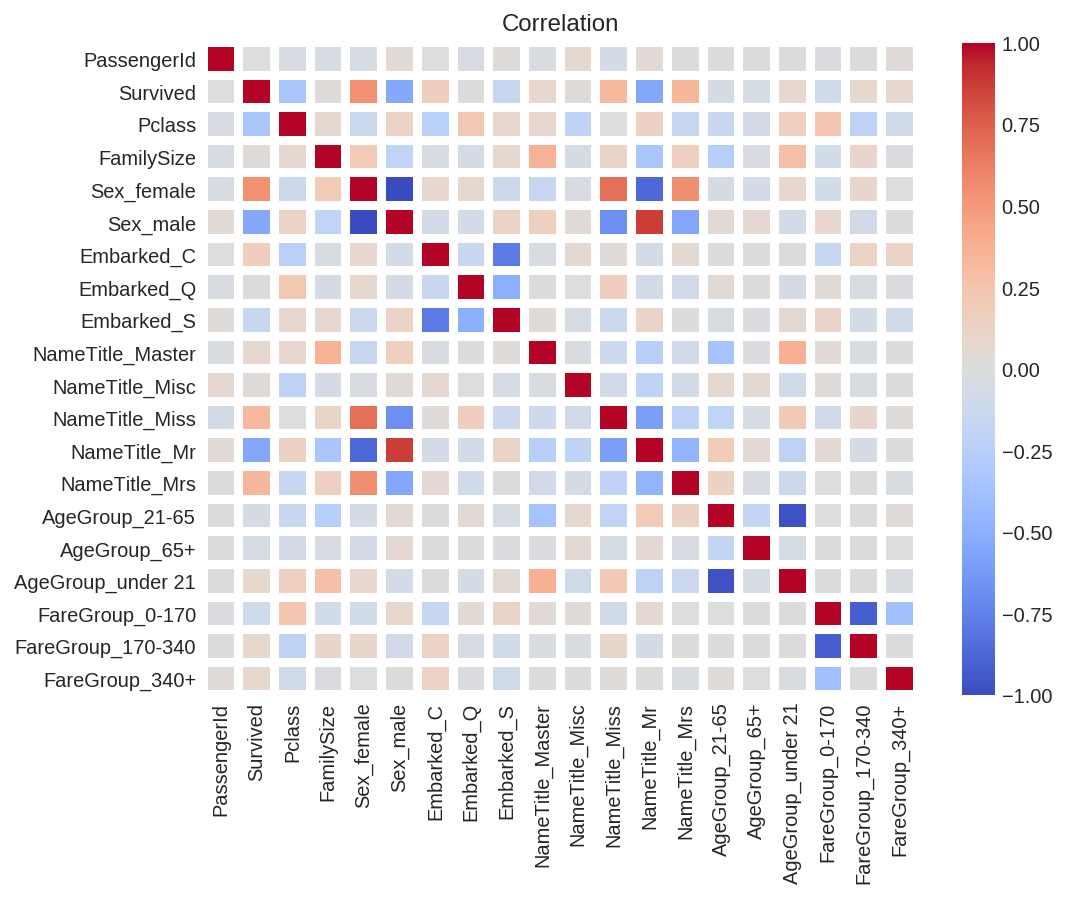

In [31]:
corr = train.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 4, linecolor = "white")
plt.title("Correlation")
plt.show()

In [32]:
upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop)

[]


# 6. PCA

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = train.drop(["PassengerId", "Survived"], axis = 1)
Y = train["Survived"]

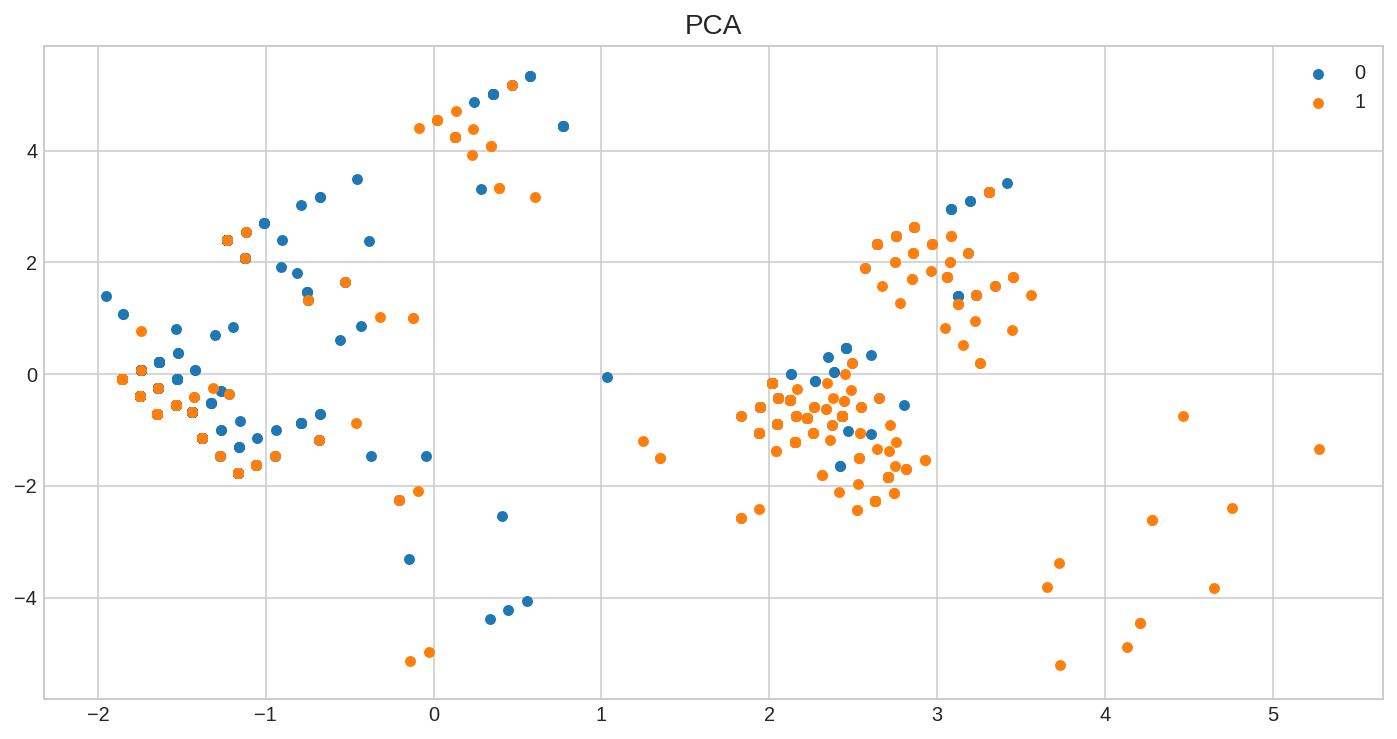

In [34]:
scaler = StandardScaler()
X_pca = scaler.fit_transform(X)

pca = PCA(n_components = 2)
X_pca_transformed = pca.fit_transform(X_pca)

plt.figure(figsize = (12,6))

for i in Y.unique():
    X_pca_filtered = X_pca_transformed[Y == i, :]
    plt.scatter(X_pca_filtered[:, 0], X_pca_filtered[:, 1], s = 20, label = i)
    
plt.legend()
plt.title("PCA", fontsize = 14)
plt.show()

# 7. Machine Learning

In [35]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

## 7.1 Model Building Function

In [36]:
import time
    
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

style.use("seaborn-whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = "retina"
    
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline

def model_builder(X, Y, pipeline, params, kfolds, classifier_name, data_split = False):
    
    """
    Trains the selected classifier using GridSearchCV with StratifiedKFold and the given pipeline and parameters. 
    Scores are calculated using cross_val_score with StratifiedKFold.
    
    Returns the results of cross_val_score, the best estimator of GridSearchCV and 
    X_train, X_test, Y_train, Y_test if data_split set to True.
    
    Parameters:
    -----------
    X : input variables
    
    Y : output variables
    
    pipeline : scikit learn Pipeline object
    
    params : dictionary of hyperparamters for GridSearchCV
    
    kfolds : number of folds for StratifiedKFold
    
    classifier_name : name of algorithm as a string
    
    data_split : if true: will train_test_split the data
                 if false: will proceed with given data
                 
    Example:
    --------
    With data_split = False:
    results, model = model_builder(X, 
                                   Y, 
                                   pipeline, 
                                   params, 
                                   10, 
                                   "Logistic Regression")
    
    With data_split = True:
    X_train, X_test, Y_train, Y_test, results, model = model_builder(X, 
                                                                     Y, 
                                                                     pipeline, 
                                                                     params, 
                                                                     10, 
                                                                     "Logistic Regression", 
                                                                      data_split = True)
    """
    
    if data_split == True:
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                            Y, 
                                                            random_state = 0, 
                                                            test_size = 0.25)
        cv = StratifiedKFold(n_splits = kfolds)

        start = time.time()

        grid = GridSearchCV(pipeline, params, cv = cv, verbose = 0, n_jobs = -1)
        grid = grid.fit(X_train, Y_train)

        print("Best Params:")
        print("")
        print(grid.best_params_)

        grid = grid.best_estimator_

        classifier_score = cross_val_score(grid, X_test, Y_test, cv = cv, n_jobs = -1)
        Y_predicted = grid.predict(X_test)

        stop = time.time()
    
        print("")
        print("#" * 11 + " ACCURACY " + "#" * 11)
        print("Cross-Validated-Score: " + str(round(classifier_score.mean(), 6)))
        print("#" * 32)

        print("")
        print("Training time: " + str(round(stop - start, 2)) + "s")

        train_size, train_score, test_score = learning_curve(grid, X_train, Y_train, cv = cv, n_jobs = -1)

        print("")
        print("Learning Curve:")

        plt.figure(figsize = (12,6))
        plt.plot(train_size, np.mean(train_score, axis = 1), label = "Train scores")
        plt.plot(train_size, np.mean(test_score, axis = 1), label = "Test scores")
        plt.title(classifier_name)
        plt.legend()
        plt.show()

        return X_train, X_test, Y_train, Y_test, classifier_score, grid
    
    if data_split == False:
        
        cv = StratifiedKFold(n_splits = kfolds)

        start = time.time()

        grid = GridSearchCV(pipeline, params, cv = cv, verbose = 0, n_jobs = -1)
        grid = grid.fit(X, Y)

        print("Best Params:")
        print("")
        print(grid.best_params_)

        grid = grid.best_estimator_

        classifier_score = cross_val_score(grid, X, Y, cv = cv, n_jobs = -1)
        Y_predicted = grid.predict(X)

        stop = time.time()
    
        print("")
        print("#" * 11 + " ACCURACY " + "#" * 11)
        print("Cross-Validated-Score: " + str(round(classifier_score.mean(), 6)))
        print("#" * 32)

        print("")
        print("Training time: " + str(round(stop - start, 2)) + "s")

        train_size, train_score, test_score = learning_curve(grid, X, Y, cv = cv, n_jobs = -1)

        print("")
        print("Learning Curve:")

        plt.figure(figsize = (12,6))
        plt.plot(train_size, np.mean(train_score, axis = 1), label = "Train scores")
        plt.plot(train_size, np.mean(test_score, axis = 1), label = "Test scores")
        plt.title(classifier_name)
        plt.legend()
        plt.show()

        return classifier_score, grid

## 7.2 Logistic Regression

Best Params:

{'log__C': 0.1, 'log__max_iter': 10000, 'log__solver': 'newton-cg', 'pca__n_components': 16}

########### ACCURACY ###########
Cross-Validated-Score: 0.830537
################################

Training time: 14.08s

Learning Curve:


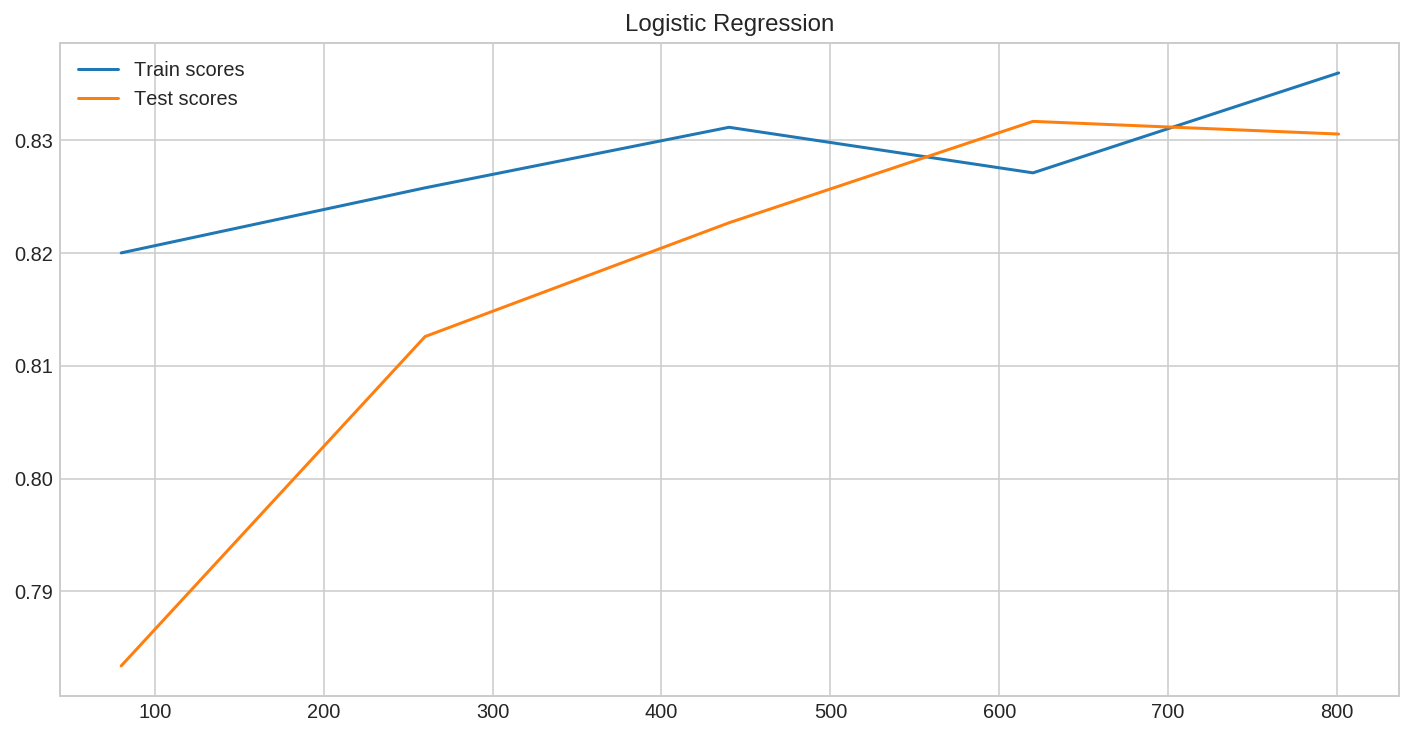

In [37]:
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("log", LogisticRegression())])

params_log = {
    "pca__n_components" : [4, 8, 16, 18],
    "log__C" : [0.001, 0.01, 0.1, 1, 1.1, 10],
    "log__max_iter" : [10000],
    "log__solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

log_score, grid_log = model_builder(X, Y, pipe_log, params_log, 10, "Logistic Regression")
Y_predicted_log = grid_log.predict_proba(X)[:, 1]

## 7.3 XGBoost

Best Params:

{'pca__n_components': 10, 'xgb__gamma': 0.7, 'xgb__learning_rate': 0.005, 'xgb__max_depth': 5, 'xgb__max_features': 3, 'xgb__n_estimators': 300}

########### ACCURACY ###########
Cross-Validated-Score: 0.820499
################################

Training time: 539.58s

Learning Curve:


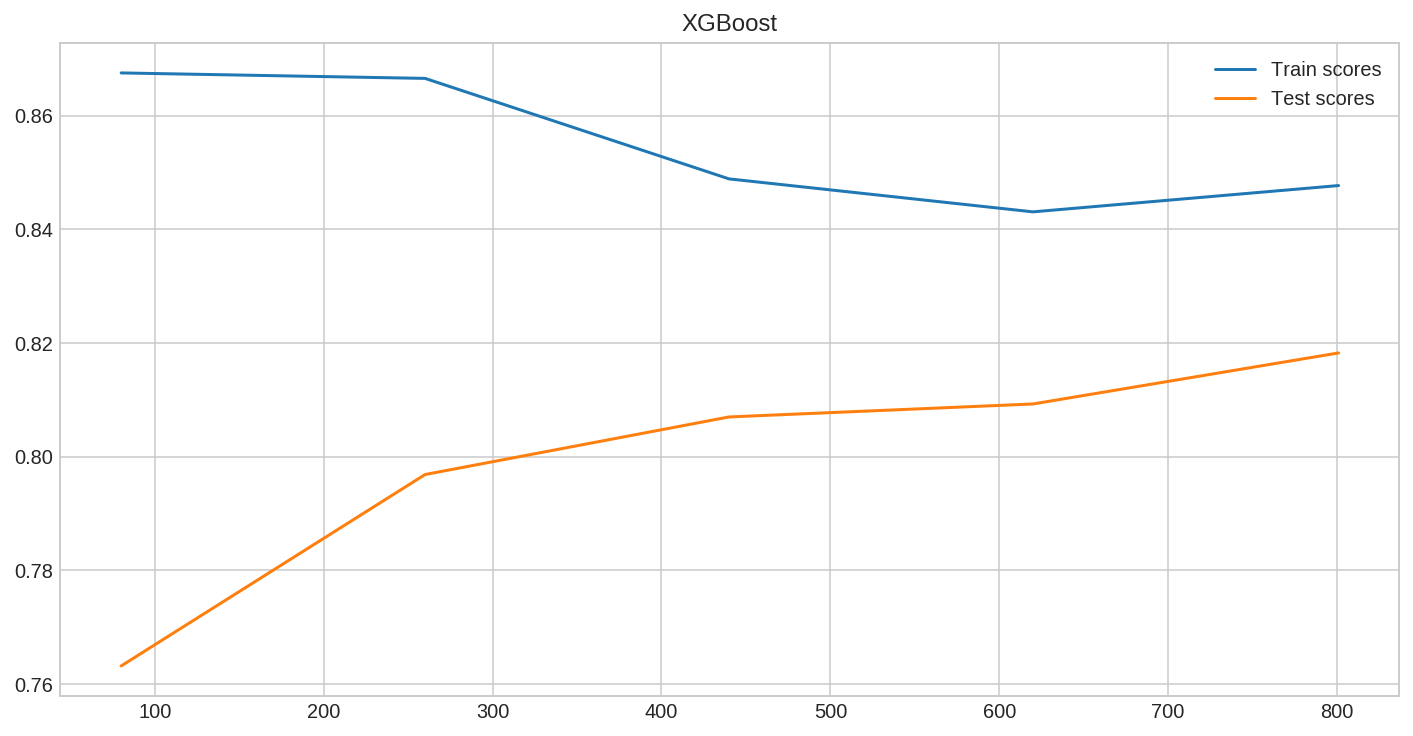

In [38]:
pipe_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("xgb", XGBClassifier())])

params_xgb = {
    "pca__n_components" : [2, 6, 10, 18],
    "xgb__n_estimators" : [300, 500, 700],
    "xgb__learning_rate" : [0.005, 0.1],
    "xgb__max_depth" : [5, 7],
    "xgb__max_features" : [3, 5], 
    "xgb__gamma" : [0.5, 0.6, 0.7]}

xgb_score, grid_xgb = model_builder(X, Y, pipe_xgb, params_xgb, 10, "XGBoost")
Y_predicted_xgb = grid_xgb.predict_proba(X)[:, 1]

## 7.4 Gradient Boosting

Best Params:

{'boost__learning_rate': 0.005, 'boost__max_depth': 3, 'boost__max_features': 3, 'boost__n_estimators': 500, 'pca__n_components': 18}

########### ACCURACY ###########
Cross-Validated-Score: 0.830574
################################

Training time: 249.04s

Learning Curve:


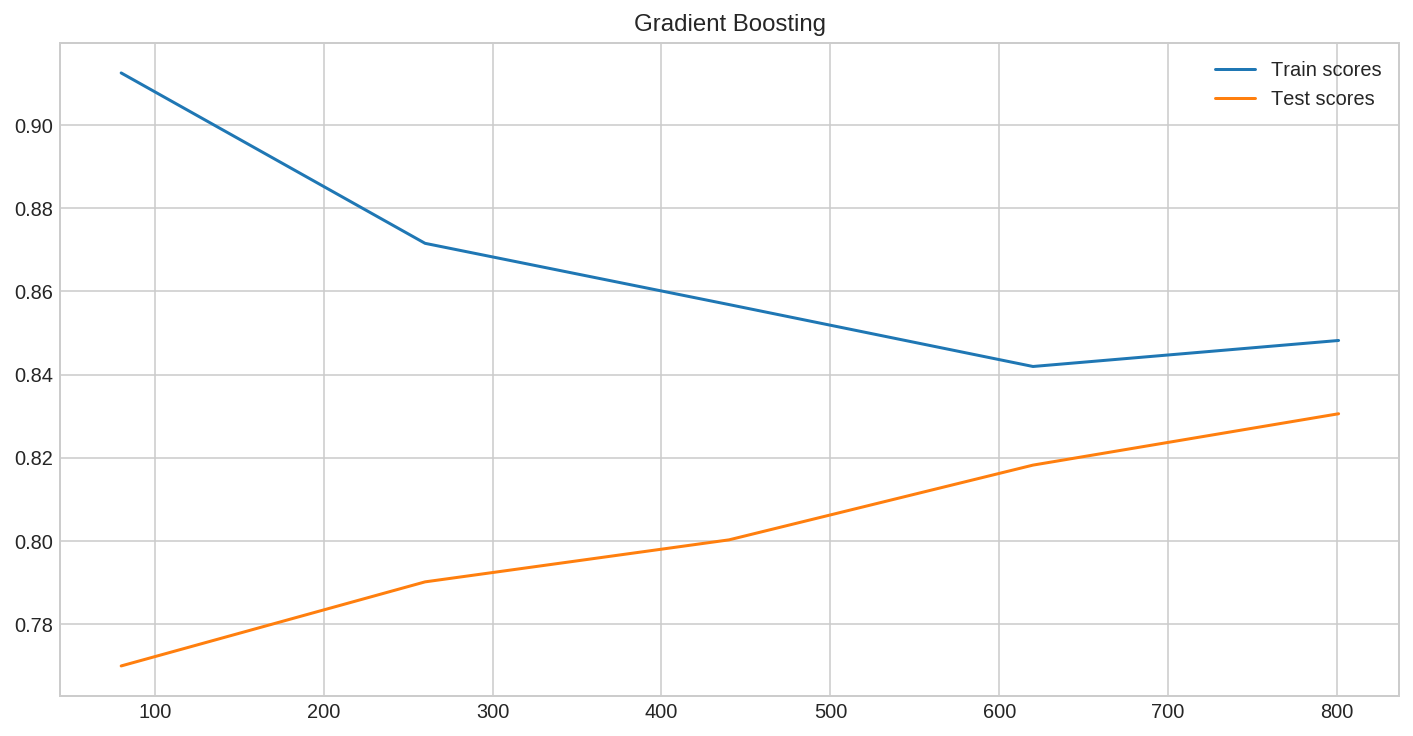

In [39]:
pipe_boost = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("boost", GradientBoostingClassifier())])

params_boost = {
    "pca__n_components" : [2, 6, 10, 18],
    "boost__n_estimators" : [300, 500, 700],
    "boost__learning_rate" : [0.005, 0.1],
    "boost__max_depth" : [3, 5],
    "boost__max_features" : [3, 5]}

boost_score, grid_boost = model_builder(X, Y, pipe_boost, params_boost, 10, "Gradient Boosting")
Y_predicted_boost = grid_boost.predict_proba(X)[:, 1]

## 7.5 Random Forest

Best Params:

{'pca__n_components': 18, 'rf__max_depth': 5, 'rf__n_estimators': 200}

########### ACCURACY ###########
Cross-Validated-Score: 0.82161
################################

Training time: 220.86s

Learning Curve:


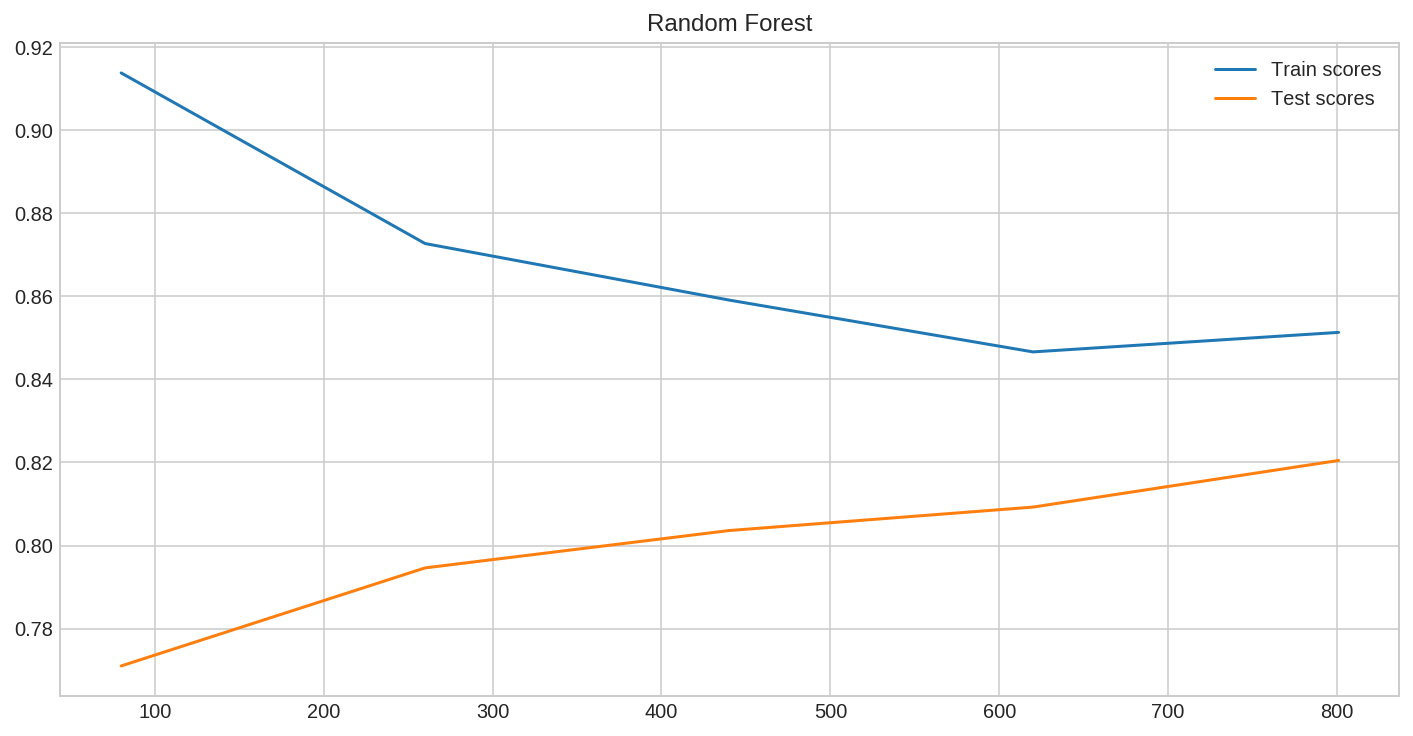

In [40]:
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("rf", RandomForestClassifier(criterion = "gini", 
                                  max_features = "auto"))])

params_rf = {
    "pca__n_components" : [2, 6, 10, 18],
    "rf__n_estimators" : [200, 250, 300, 400],
    "rf__max_depth" : [1, 3, 5, 7, 9]}

rf_score, grid_rf = model_builder(X, Y, pipe_rf, params_rf, 10, "Random Forest")
Y_predicted_rf = grid_rf.predict_proba(X)[:, 1]

## 7.6 SVM

Best Params:

{'pca__n_components': 18, 'svm__C': 1, 'svm__gamma': 0.1}

########### ACCURACY ###########
Cross-Validated-Score: 0.833933
################################

Training time: 24.55s

Learning Curve:


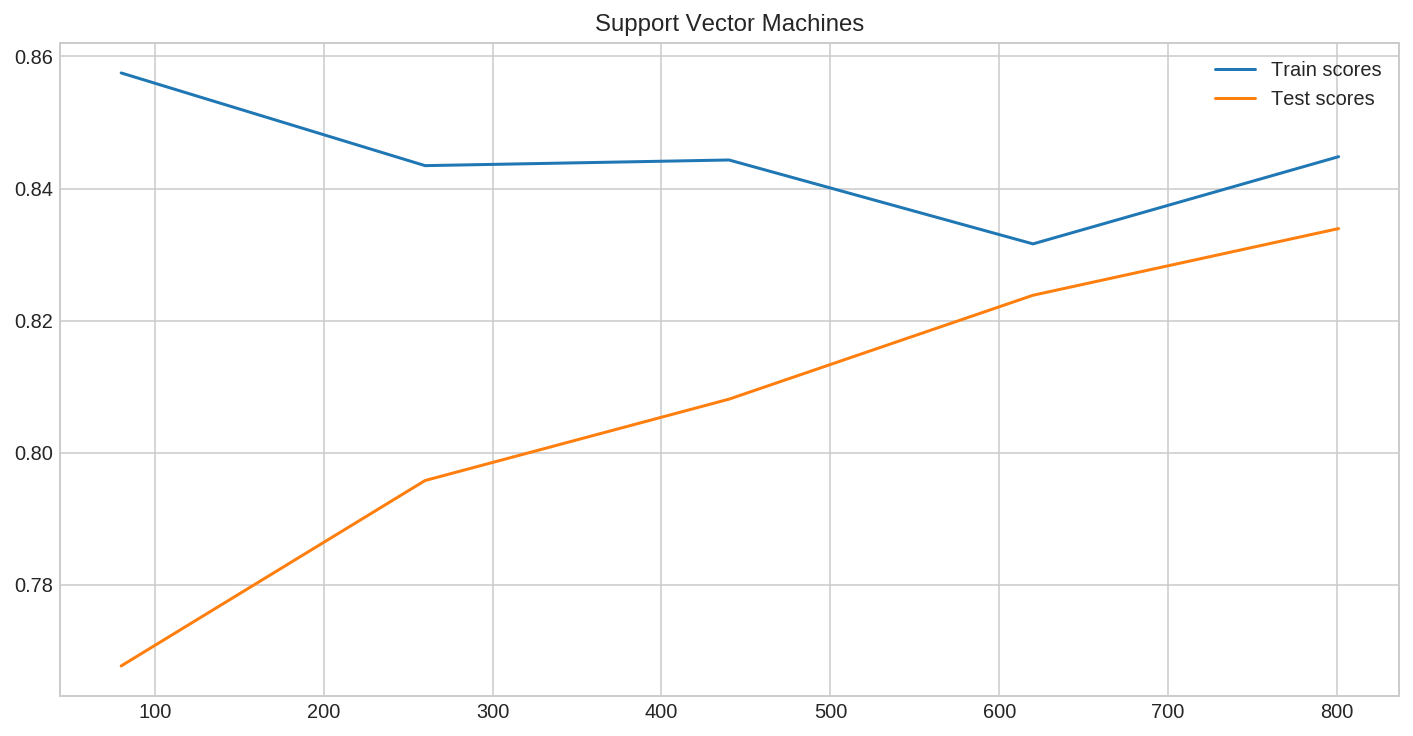

In [41]:
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("svm", SVC(probability = True, kernel = "rbf"))])

params_svm = {
    "pca__n_components" : [2, 6, 10, 18],
    "svm__C" : [0.01, 0.1, 1, 1.1, 2],
    "svm__gamma" : [0.01, 0.1, 1]}

svm_score, grid_svm = model_builder(X, Y, pipe_svm, params_svm, 10, "Support Vector Machines")
Y_predicted_svm = grid_svm.predict_proba(X)[:, 1]

## 7.7 Bagging Classifier

Best Params:

{'bag__max_features': 9, 'bag__max_samples': 9, 'bag__n_estimators': 100, 'pca__n_components': 18}

########### ACCURACY ###########
Cross-Validated-Score: 0.774419
################################

Training time: 92.72s

Learning Curve:


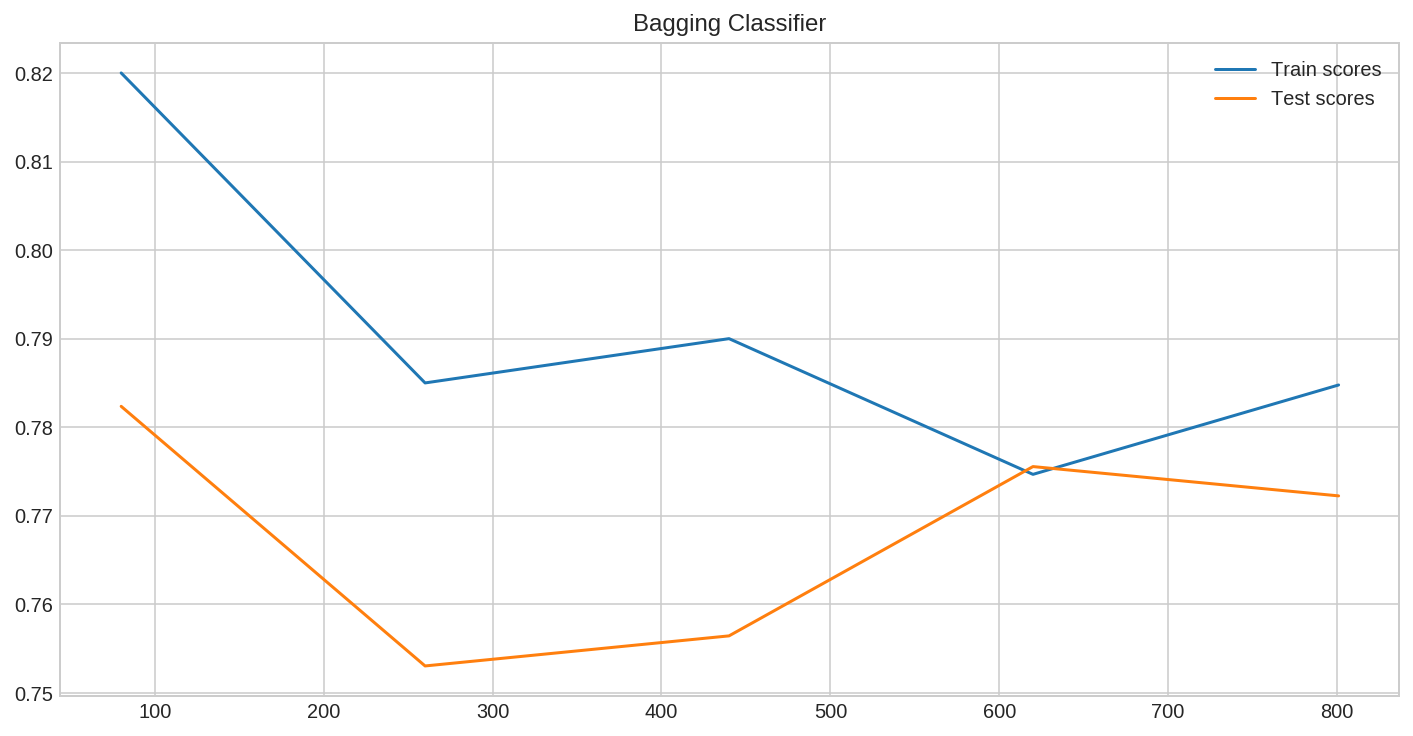

In [42]:
pipe_bag = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("bag", BaggingClassifier())])

params_bag = {
    "pca__n_components" : [2, 6, 10, 18],
    "bag__n_estimators" : [30, 50, 70, 100],
    "bag__max_features" : [3, 5, 7, 9],
    "bag__max_samples" : [3, 5, 7, 9]}

bag_score, grid_bag = model_builder(X, Y, pipe_bag, params_bag, 10, "Bagging Classifier")
Y_predicted_bag = grid_bag.predict_proba(X)[:, 1]

## 7.8 Extra Trees Classifier

Best Params:

{'pca__n_components': 18, 'xt__max_depth': 5, 'xt__n_estimators': 500}

########### ACCURACY ###########
Cross-Validated-Score: 0.830574
################################

Training time: 123.98s

Learning Curve:


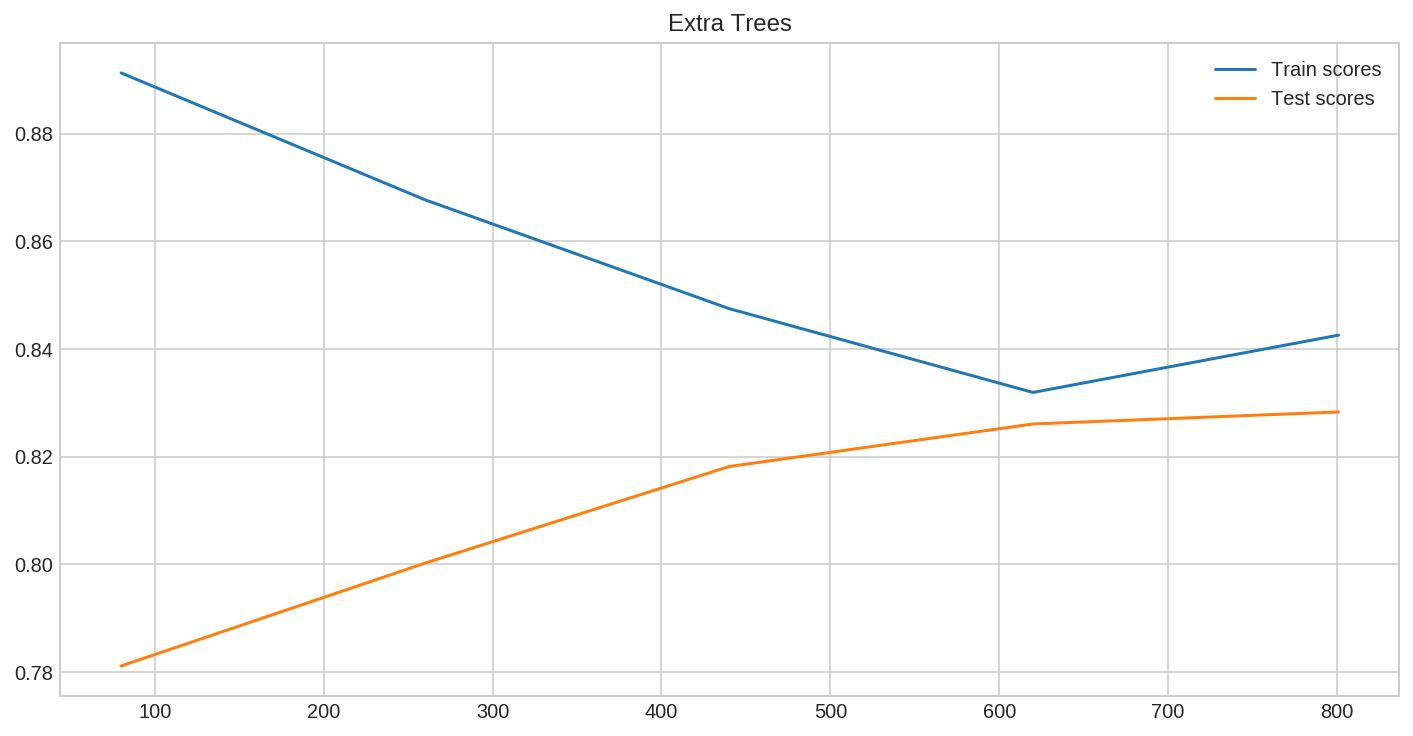

In [43]:
pipe_xt = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("xt", ExtraTreesClassifier(criterion = "gini", 
                                max_features = "auto"))])

params_xt = {
    "pca__n_components" : [2, 6, 10, 18],
    "xt__n_estimators" : [300, 500, 700],
    "xt__max_depth" : [5, 7, 9]}

xt_score, grid_xt = model_builder(X, Y, pipe_xt, params_xt, 10, "Extra Trees")
Y_predicted_xt = grid_xt.predict_proba(X)[:, 1]

## 7.9 K-Nearest-Neighbor

Best Params:

{'knn__leaf_size': 20, 'knn__n_neighbors': 7}

########### ACCURACY ###########
Cross-Validated-Score: 0.817129
################################

Training time: 1.54s

Learning Curve:


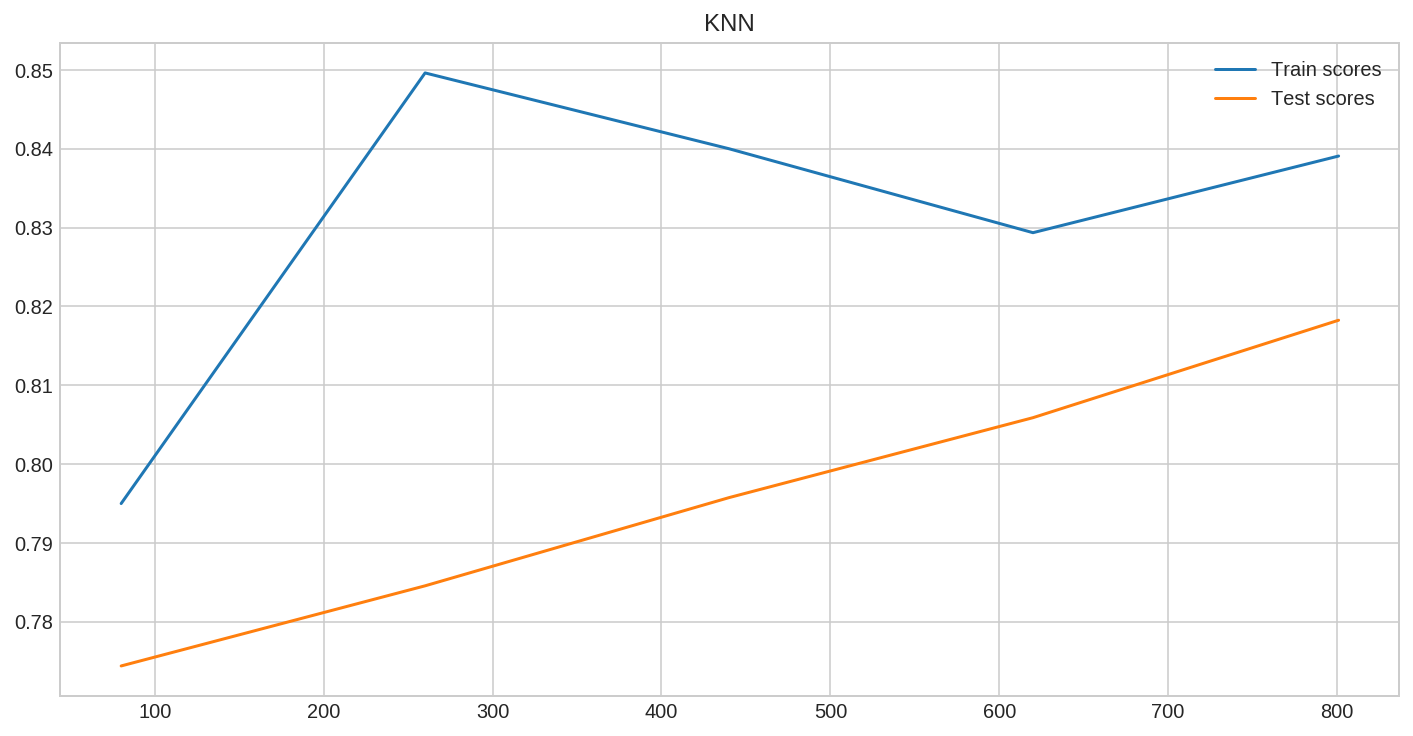

In [44]:
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    #("pca", PCA()),
    ("knn", KNeighborsClassifier(algorithm = "auto"))])

params_knn = {
    #"pca__n_components" : [2, 6, 10, 18],
    "knn__n_neighbors" : [2, 3, 5, 7, 9],
    "knn__leaf_size" : [10, 20, 30, 40]}

knn_score, grid_knn = model_builder(X, Y, pipe_knn, params_knn, 10, "KNN")
Y_predicted_knn = grid_knn.predict_proba(X)[:, 1]

## 7.10 CatBoost

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Params:

{'cat__depth': 2, 'cat__learning_rate': 0.01, 'cat__n_estimators': 300}

########### ACCURACY ###########
Cross-Validated-Score: 0.832784
################################

Training time: 196.07s

Learning Curve:


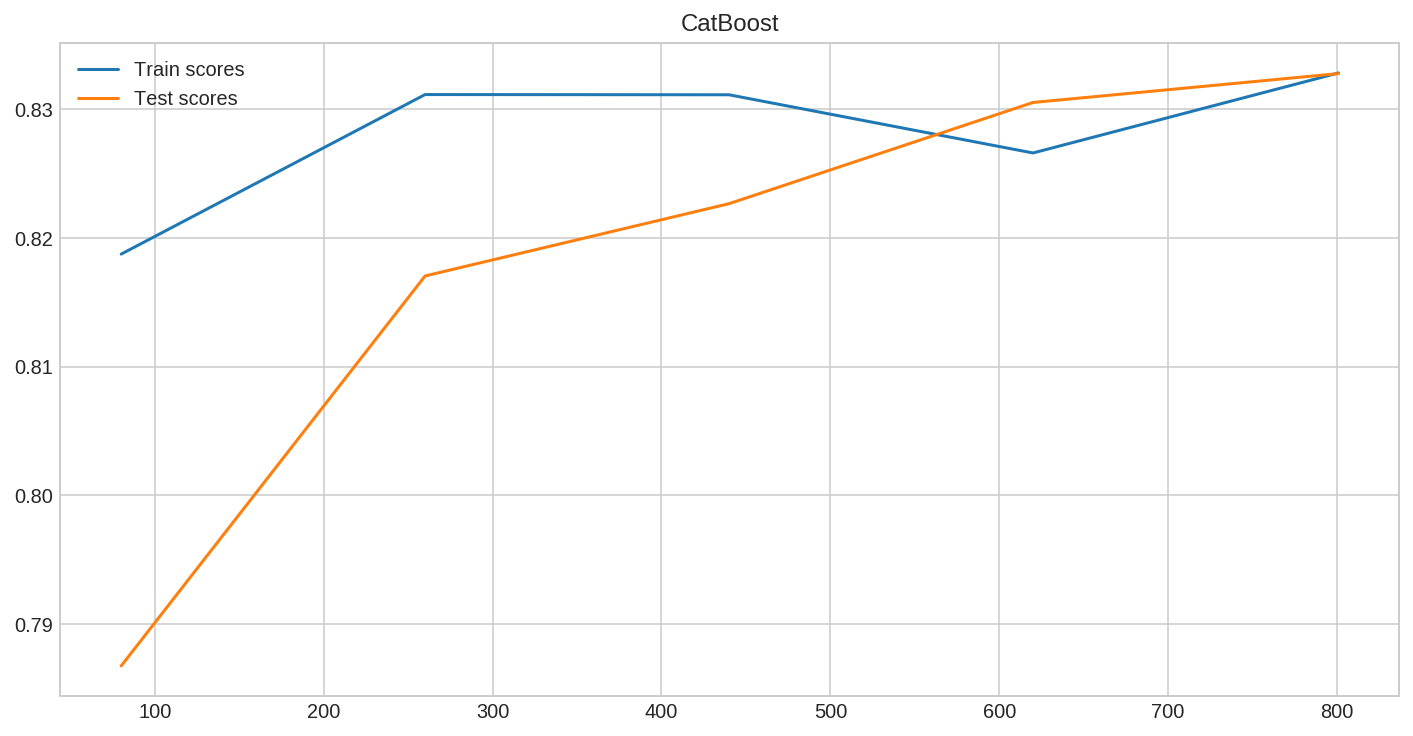

In [45]:
pipe_cat = Pipeline([
    ("scaler", StandardScaler()),
    ("cat", CatBoostClassifier(verbose = 0))])

params_cat = {
    "cat__depth" : [2, 3, 4, 5],
    "cat__learning_rate" : [0.001, 0.01, 0.1, 1, 1.1],
    "cat__n_estimators" : [300, 400, 500, 600]}

cat_score, grid_cat = model_builder(X, Y, pipe_cat, params_cat, 10, "CatBoost")
Y_predicted_cat = grid_cat.predict_proba(X)[:, 1]

## 7.11 LightGBM

Best Params:

{'lgb__learning_rate': 0.01, 'lgb__n_estimators': 300, 'lgb__num_leaves': 5}

########### ACCURACY ###########
Cross-Validated-Score: 0.830537
################################

Training time: 77.23s

Learning Curve:


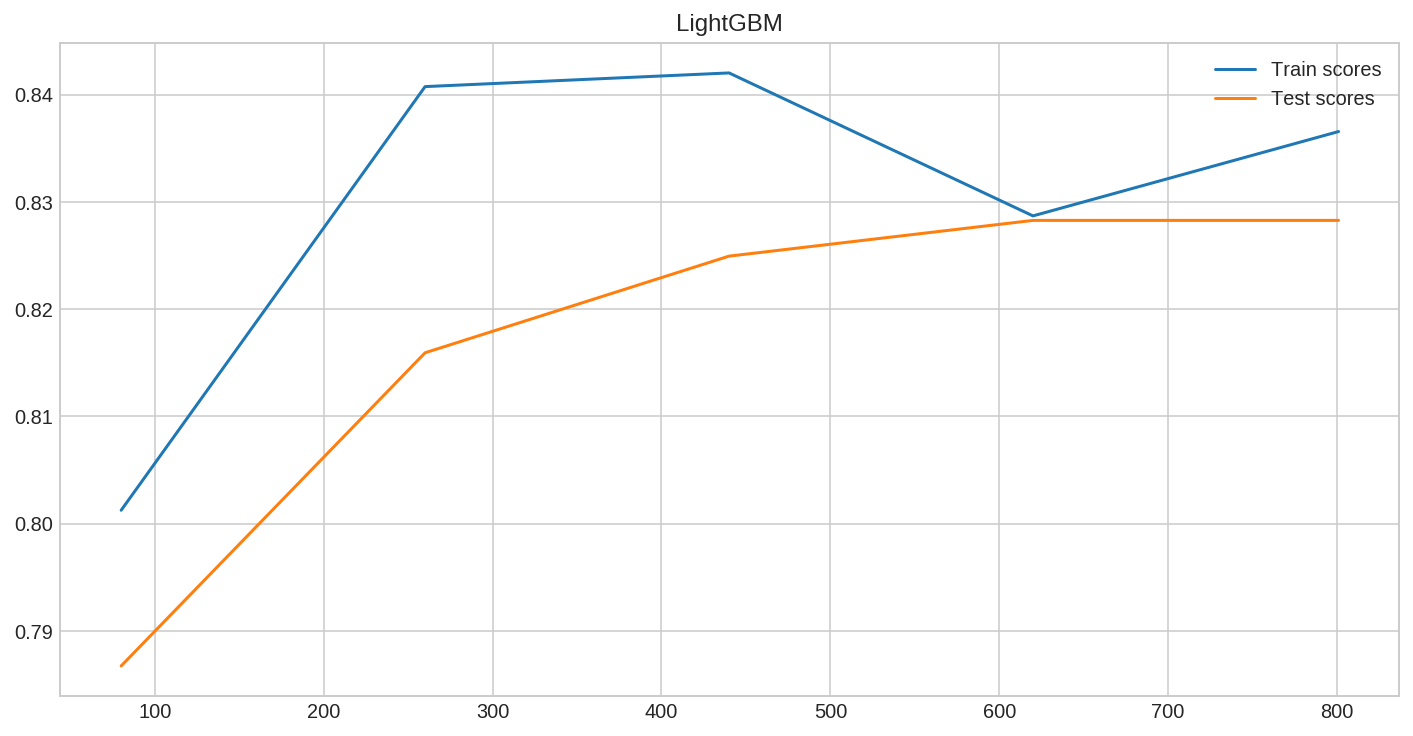

In [46]:
pipe_gbm = Pipeline([
    ("scaler", StandardScaler()),
    ("lgb", lgb.LGBMClassifier())])

params_gbm = {
        "lgb__num_leaves": [5, 7, 40, 60, 100],
        "lgb__n_estimators": [300, 700, 1000],
        "lgb__learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1]}

gbm_score, grid_gbm = model_builder(X, Y, pipe_gbm, params_gbm, 10, "LightGBM")
Y_predicted_gbm = grid_gbm.predict_proba(X)[:, 1]

## 7.12 Model Comparison

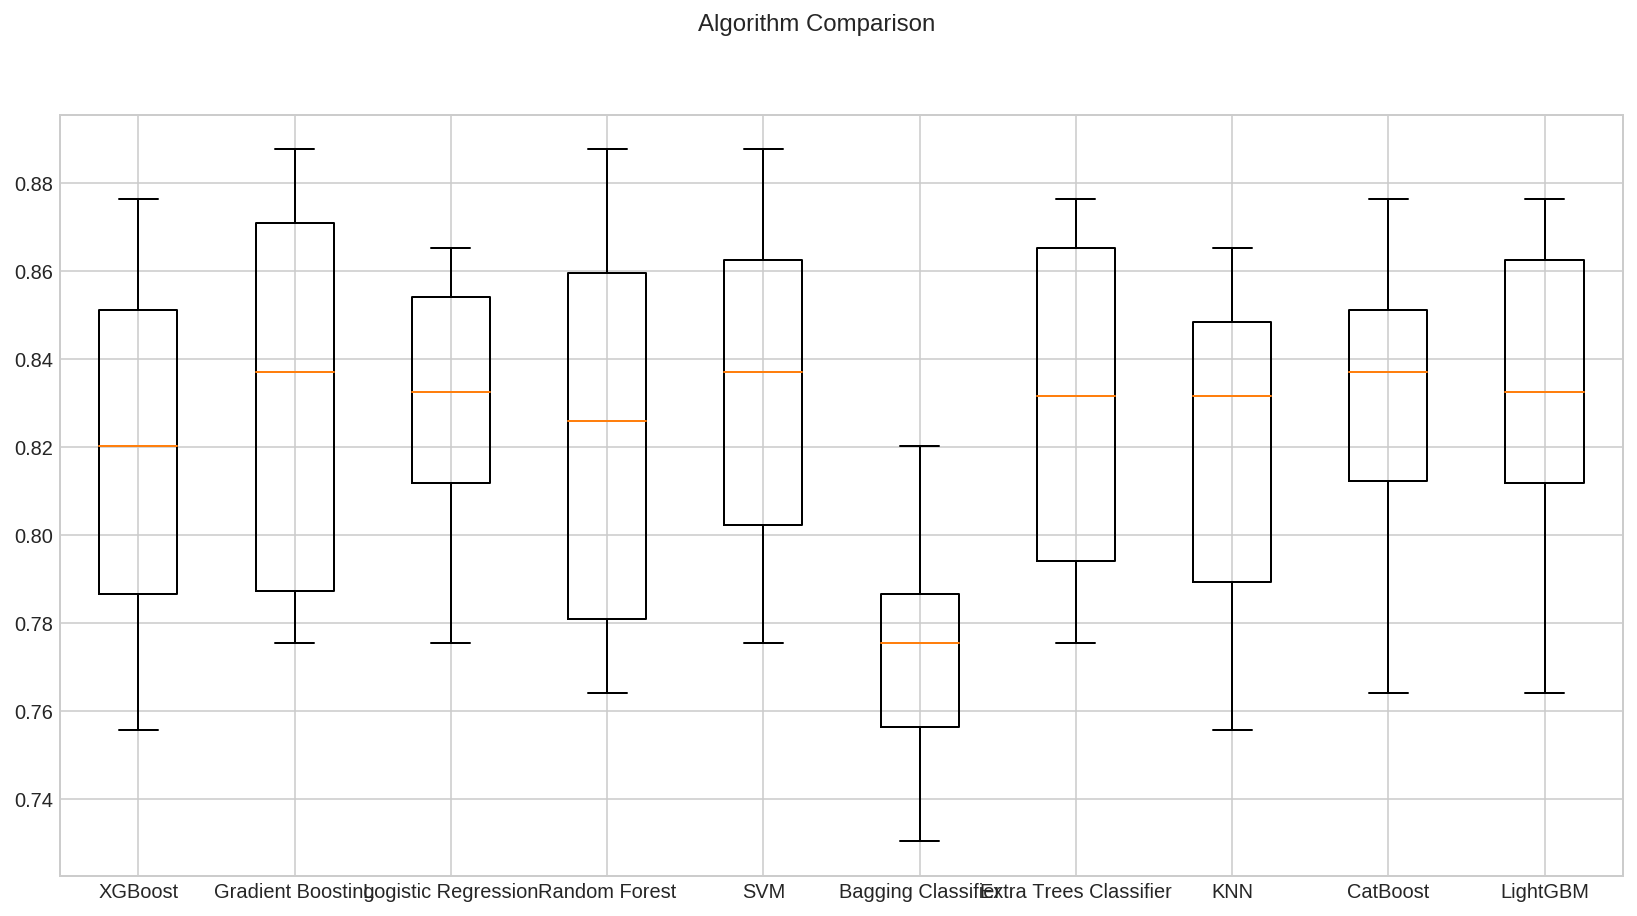

In [47]:
all_results = [xgb_score, boost_score, log_score, rf_score, 
               svm_score, bag_score, xt_score, knn_score, cat_score, gbm_score]

result_names = ["XGBoost", 
                "Gradient Boosting", 
                "Logistic Regression", 
                "Random Forest", 
                "SVM", 
                "Bagging Classifier", 
                "Extra Trees Classifier", 
                "KNN", 
                "CatBoost", 
                "LightGBM"]

fig = plt.figure(figsize = (14,7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(all_results)
ax.set_xticklabels(result_names)
plt.show()

# 8. Neural Network

In [48]:
%%capture
!pip install keras-tuner

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    random_state = 0, 
                                                    test_size = 0.25)

In [51]:
%%capture

def tune_model(hp):

    nn = Sequential()

    nn.add(Dense(hp.Choice("units_1", [512, 1024, 2048]), activation = "relu", input_shape = (18,)))
    nn.add(Dropout(hp.Choice("dropout_1", [0.0, 0.15, 0.2, 0.25])))
    nn.add(Dense(hp.Choice("units_2", [128, 256, 512]), activation = "relu"))
    nn.add(Dropout(hp.Choice("dropout_2", [0.0, 0.15, 0.2, 0.25])))
    nn.add(Dense(hp.Choice("units_3", [32, 64, 128]), activation = "relu"))
    nn.add(Dropout(hp.Choice("dropout_3", [0.0, 0.15, 0.2, 0.25])))
    nn.add(Dense(hp.Choice("units_4", [8, 16, 32]), activation = "relu"))
    nn.add(Dropout(hp.Choice("dropout_4", [0.0, 0.15, 0.2, 0.25])))
    nn.add(Dense(1, activation = "relu"))
    
    lr = hp.Choice("learning_rate", [0.0001, 0.001, 0.01, 0.1])
    mm = hp.Choice("momentum", [0.0, 0.2, 0.4, 0.6, 0.8])
    
    nn.compile(optimizer = keras.optimizers.RMSprop(learning_rate = lr, momentum = mm), 
               loss = "binary_crossentropy", 
               metrics = ["accuracy"])
    
    return nn

tuner = RandomSearch(tune_model, 
                     objective = "val_accuracy", 
                     max_trials = 3)

tuner.search(x = X_train, 
             y = Y_train, 
             verbose = 3, 
             epochs = 400, 
             batch_size = 25, 
             validation_data = (X_test, Y_test))

In [52]:
print("Best Params: " + str(tuner.oracle.get_best_trials(num_trials = 1)[0].hyperparameters.values))

nn = tuner.get_best_models()[0]

print("")
print("Test score: " + str(nn.evaluate(X_test, Y_test)))
print("")
print("Train score: " + str(nn.evaluate(X_train, Y_train)))

Best Params: {'units_1': 512, 'dropout_1': 0.0, 'units_2': 128, 'dropout_2': 0.0, 'units_3': 32, 'dropout_3': 0.25, 'units_4': 8, 'dropout_4': 0.0, 'learning_rate': 0.01, 'momentum': 0.2}

223/223 [==============================] - 0s 507us/sample - loss: 3.5166 - accuracy: 0.7713
Test score: [3.5166477280347337, 0.77130044]

668/668 [==============================] - 0s 48us/sample - loss: 3.6432 - accuracy: 0.7635
Train score: [3.64322074444708, 0.76347303]


In [53]:
Y_predicted_nn = nn.predict(test.drop(["PassengerId"], axis = 1))
Y_predicted_nn = (Y_predicted_nn.ravel() > 0.5).astype(int)

# 9. ROC-Curve and AUC-Score

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

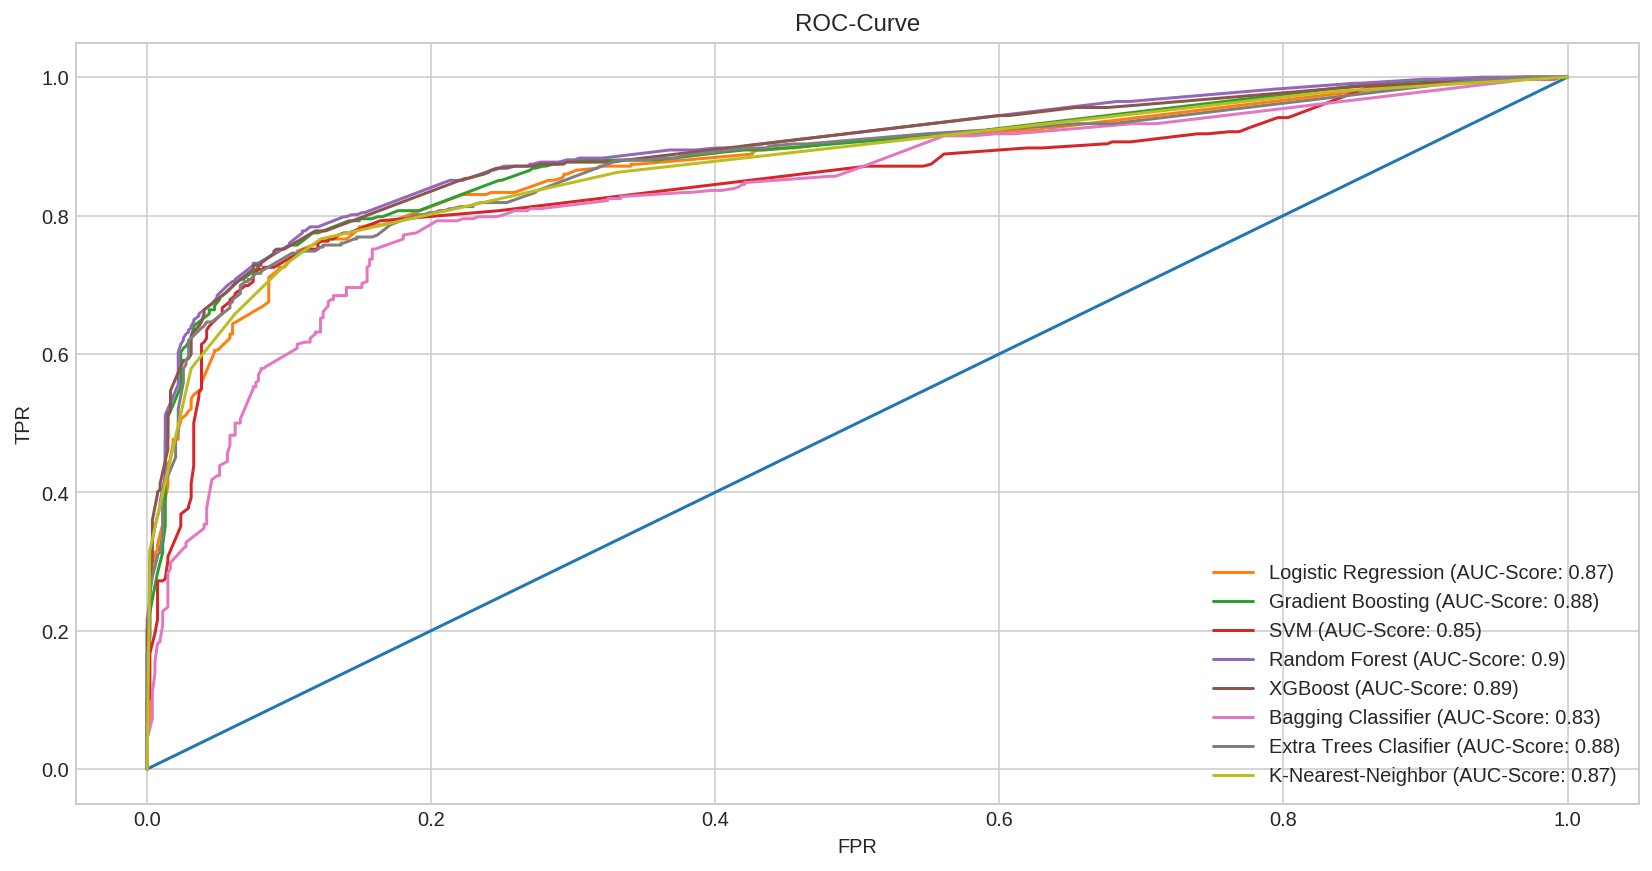

In [55]:
log_fpr, log_tpr, log_treshholds = roc_curve(Y, Y_predicted_log)
boost_fpr, boost_tpr, boost_treshholds = roc_curve(Y, Y_predicted_boost) 
svm_fpr, svm_tpr, svm_treshholds = roc_curve(Y, Y_predicted_svm)
rf_fpr, rf_tpr, rf_treshholds = roc_curve(Y, Y_predicted_rf)
xgb_fpr, xgb_tpr, xgb_treshholds = roc_curve(Y, Y_predicted_xgb)
bag_fpr, bag_tpr, bag_treshholds = roc_curve(Y, Y_predicted_bag)
xt_fpr, xt_tpr, xt_treshholds = roc_curve(Y, Y_predicted_xt)
knn_fpr, knn_tpr, knn_treshholds = roc_curve(Y, Y_predicted_knn)

auc_score_log = roc_auc_score(Y, Y_predicted_log)
auc_score_boost = roc_auc_score(Y, Y_predicted_boost)
auc_score_svm = roc_auc_score(Y, Y_predicted_svm)
auc_score_rf = roc_auc_score(Y, Y_predicted_rf)
auc_score_xgb = roc_auc_score(Y, Y_predicted_xgb)
auc_score_bag = roc_auc_score(Y, Y_predicted_bag)
auc_score_xt = roc_auc_score(Y, Y_predicted_xt)
auc_score_knn = roc_auc_score(Y, Y_predicted_knn)

plt.figure(figsize = (14,7))
plt.plot([0,1], [0,1])
plt.plot(log_fpr, log_tpr, label = "Logistic Regression (AUC-Score: " + str(round(auc_score_log, 2)) + ")")
plt.plot(boost_fpr, boost_tpr, label = "Gradient Boosting (AUC-Score: " + str(round(auc_score_boost, 2)) + ")")
plt.plot(svm_fpr, svm_tpr, label = "SVM (AUC-Score: " + str(round(auc_score_svm, 2)) + ")")
plt.plot(rf_fpr, rf_tpr, label = "Random Forest (AUC-Score: " + str(round(auc_score_rf, 2)) + ")")
plt.plot(xgb_fpr, xgb_tpr, label = "XGBoost (AUC-Score: " + str(round(auc_score_xgb, 2)) + ")")
plt.plot(bag_fpr, bag_tpr, label = "Bagging Classifier (AUC-Score: " + str(round(auc_score_bag, 2)) + ")")
plt.plot(xt_fpr, xt_tpr, label = "Extra Trees Clasifier (AUC-Score: " + str(round(auc_score_xt, 2)) + ")")
plt.plot(knn_fpr, knn_tpr, label = "K-Nearest-Neighbor (AUC-Score: " + str(round(auc_score_knn, 2)) + ")")
plt.title("ROC-Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# 10. Model Stacking

In [56]:
stack = StackingClassifier(estimators = [("XGBoost", grid_xgb), 
                                         ("GradientBoosting", grid_boost),
                                         ("RandomForest", grid_rf), 
                                         ("Logistic Regression", grid_log), 
                                         ("SVM", grid_svm),  
                                         ("Extra Trees Classifier", grid_xt), 
                                         ("KNeighborsClassifier", grid_knn), 
                                         ("CatBoost", grid_cat), 
                                         ("LightGBM", grid_gbm)], n_jobs = -1)


cv = StratifiedKFold(n_splits = 5)

stack = stack.fit(X, Y)
stack_score = cross_val_score(stack, X, Y, cv = cv, n_jobs = -1)

print("#" * 11 + " FINAL ACCURACY " + "#" * 11)
print("Cross-Validated-Score: " + str(round(stack_score.mean(), 6)))
print("#" * 38)

Y_predicted_stack = stack.predict(test.drop(["PassengerId"], axis = 1))

########### FINAL ACCURACY ###########
Cross-Validated-Score: 0.828291
######################################


## 10.1 Stacked Model Learning Curve

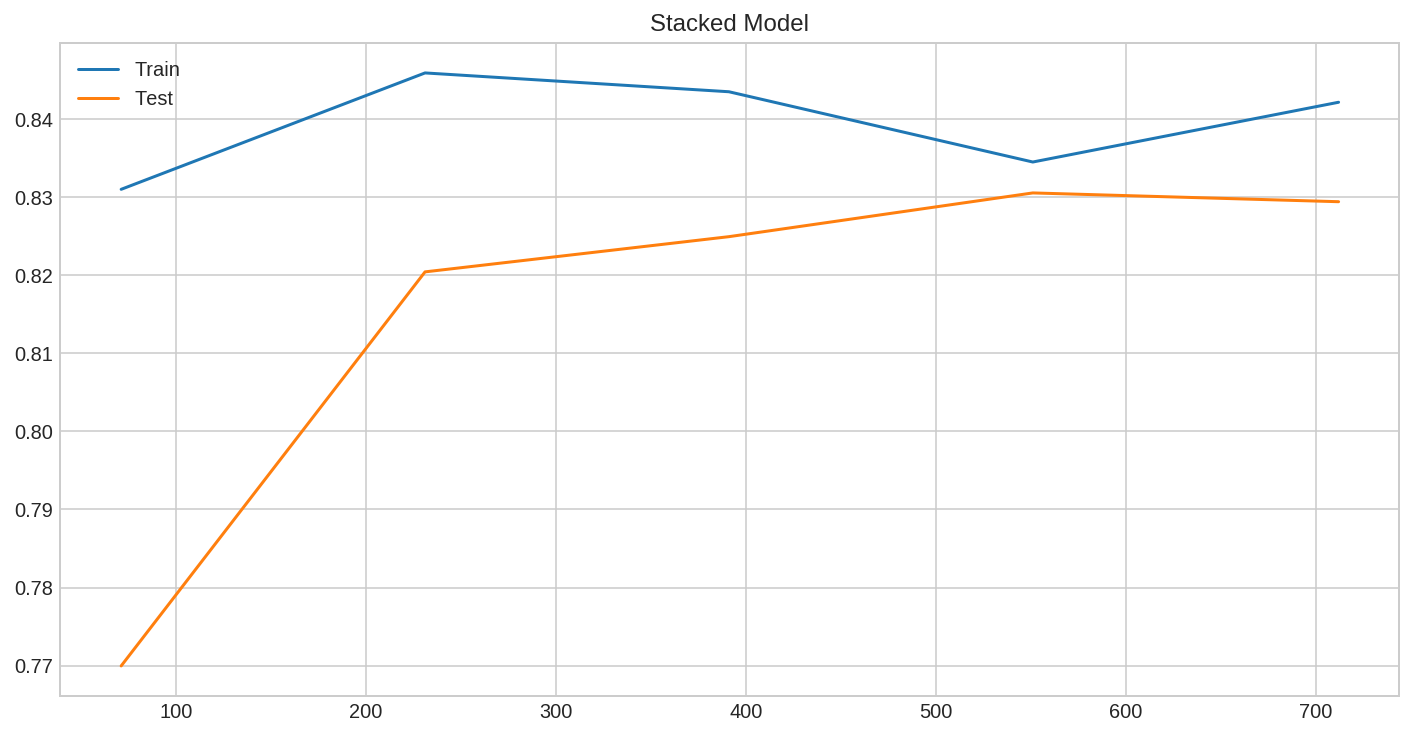

In [57]:
train_size, train_score, test_score = learning_curve(stack, X, Y, cv = cv, n_jobs = -1)

plt.figure(figsize = (12,6))
plt.plot(train_size, np.mean(train_score, axis = 1), label = "Train")
plt.plot(train_size, np.mean(test_score, axis = 1), label = "Test")
plt.title("Stacked Model")
plt.legend()
plt.show()

# 11. Submission

## 11.1 Classifiers

In [58]:
submission = pd.DataFrame({"PassengerId" : test.PassengerId, 
                           "Survived" : Y_predicted_stack})

submission.to_csv("submission_clf.csv", index = False)

In [59]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 11.2 Neural Network

In [60]:
submission_nn = pd.DataFrame({"PassengerId" : test.PassengerId, 
                           "Survived" : Y_predicted_nn})

submission_nn.to_csv("submission_nn.csv", index = False)

In [61]:
submission_nn.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
